**Table of contents**<a id='toc0_'></a>    
- [Top Zip Codes For Investment](#toc1_)
 - [Phase 4 Group 2 Project Members:](#toc1_1_)
 - [Step 1.Business Understanding](#toc1_2_)
     - [1.1 Background](#toc1_2_1)
     - [1.2 Project Overview](#toc1_2_2)
     - [1.3 Project Question](#toc1_2_3)
     - [1.4 Objectives ](#toc1_2_4)
- [Step 2.Data Understanding](#toc1_3_)
- [Step 3.Data Conversion](#toc1_4_)
    - [3.1 Reshape from Wide to Long Format](#toc1_4_1)
- [Step 4.EDA And Visualization](#toc1_5_)
    - [4.1 Univariate Analysis](#toc1_5_1_)
    - [4.1 Bivariate Analysis](#toc1_5_2_)
    - [4.1 Multivariate Analysis](#toc1_5_3_)
- [Step 5.Data Preprocessing](#toc1_6_)
    - [5.1 Checking For Stationarity](#toc1_6_1_)
        - [5.1.1 Dickey-fuller Test](#toc1_6_1_1_)
- [Step 6.Modelling](#toc1_7_)
    - [6.1 Baseline Model - ARIMA](#toc1_7_1_)
    - [6.2 Testing The Model](#toc1_7_2_)
    - [6.3 Model Evaluation ](#toc1_7_3_)
    - [6.4 Forecasting For The Next Three Years](#toc1_7_4_)
    - [6.5 Forecasting For Every Zipcode](#toc1_7_5_)
- [Step 7.Conclusion ](#toc1_8_)
- [Step 8.Limitations](#toc1_9_)
- [Step 9.Recommendation](#toc1_10_)


## <a id='toc1_'></a>[Top Zip Codes For Investment.](#toc0_)

### <a id='toc1_1_1_'></a>[Final Project Phase 4 Group 2,Members:](#toc0_)
* Emmanuel
* Winnie
* Denis
* Phelix
* Hellen
* Ismail
* Sheila

## <a id='toc1_2_'></a>[Step 1 : Business Understanding](#toc0_)

  ### <a id='toc1_2_1_'></a>[1.1 Background](#toc0_)

The real estate market is dynamic and influenced by an array of factors ranging from economic trends and population growth to market sentiment and regulatory changes. Kar-Dak Investments Group recognizes the need to leverage data science techniques to gain a competitive edge in identifying high-potential investment opportunities.

In a constantly evolving real estate landscape, various elements, including economic shifts, population dynamics, market emotions, and regulatory shifts, converge to shape market trends. Acknowledging this complexity, the Kar-Dak Investment Group acknowledges the strategic advantage of harnessing data science methodologies to proactively uncover lucrative investment prospects.

### <a id='toc1_2_3_'></a>[1.2 Project Overview](#toc0_)

The goal of this project is to assist the Kar-Dak Investment Group in identifying the top 5 most promising zip codes for real estate investment opportunities. The analysis will be conducted using the Zillow housing dataset, which encompasses housing data spanning from April 1996 to April 2018. By leveraging this dataset, the project aims to pinpoint zip codes that have demonstrated strong potential for growth and return on investment within the specified time frame.

The primary objective of this project is to facilitate informed real estate investment decisions for the Kar-Dak Investment Group. By leveraging the extensive Zillow housing dataset, which spans from April 1996 to April 2018, the project aims to identify the top 5 most favorable zip codes for potential investment opportunities.

### <a id='toc1_2_4_'></a>[1.3 Project Question](#toc0_)

This Project aims at answering the question:

What are the top 5 best zip code areas for the Kar-Dak Investments to consider?

### <a id='toc1_2_5_'></a>[1.4 Objectives](#toc0_)

1. To use Time Series Model to determine the top 5 zip codes to invest in
2. To find the top 5 zip codes nationwide with the highest ROI within accepted standard deviation threshold (variability in returns)
3. To Perform Forecasting for Future House Prices
4. Develop time series models to forecast real estate prices for different zip codes over various time horizons.
5. Evaluate the stability and predictability of real estate prices for different zip codes.
6. Determine potential profit margins based on historical data and forecasted price growth.
7. To Combine insights from the above analyses to make a comprehensive recommendation.
8. To effectively identify cities that are optimal for both short-term and long-term investment
9. To create user-friendly interfaces to facilitate easy access to forecast/ predictions and insights.

## <a id='toc1_3_'></a>[Step 2.Data Understanding](#toc0_)

In this section, we will do the following to get more insights about our dataset before proceeding to subsequent steps.
1. Import the Libraries
2. Load and Explore the Time Series Data
3. Inspect the Data Types
4. Inspect the column values

### <a id='toc1_3_3'></a>[2.3 Summary Of The Dataset](#toc0_)


The key columns in the dataset are as follows:

RegionID - This is unique Id for the Regions.

SizeRank - This is the ranking done based on the size of the Region.

RegionName - This field contains the zip code of the Region.

RegionType - Type of Region is Zip.

StateName - State.

City - This column provide the specific City Name of Housing Data.

Metro - This provide the name of the metro city around that Region.

County Name - This is the County Name for that Region.

Months Column - These Columns contains the prices of Region for every month.

By analyzing this dataset, we can gain a comprehensive understanding of the top five most promising real estate investment zip code areas.

The dataset covers a significant time period, allowing for the exploration of long-term trends and capturing various market conditions. It provides a valuable resource for conducting time series analysis and developing predictive models to forecast future stock prices

### <a id='toc1_3_1'></a>[2.1 Importing Necessary Packages](#toc0_)

In order to work with various do proper data cleaning, explolation, feature engineering, model and evaluation, below cell starts by importing various relevant libraries

In [ ]:
#Importing the libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import folium
import matplotlib.dates as mdates
import math
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### <a id='toc1_3_2'></a>[2.2 Loading and Exploring the Dataset](#toc0_)

Below cell loads the csv file of zillow dataset, using a read_csv method, as a dataframe and saving it in a variable df, for purposes of subsequent work.

In [ ]:
#Loading dataset into pandas DataFrame
df = pd.read_csv('zillow_data.csv')

The following code cell does a general view of the df, checking on top5 and bottom 5 of the df with a general indication of number of rows and columns at the bottom

In [ ]:
# viewing df
df


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500.0,1007500.0,1007800.0,1009600.0,1013300.0,1018700.0,1024400.0,1030700.0,1033800.0,1030600.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000.0,310000.0,312500.0,314100.0,315000.0,316600.0,318100.0,319600.0,321100.0,321800.0
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000.0,320600.0,320200.0,320400.0,320800.0,321200.0,321200.0,323000.0,326900.0,329900.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800.0,1287700.0,1287400.0,1291500.0,1296600.0,1299000.0,1302700.0,1306400.0,1308500.0,1307000.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100.0,119400.0,120000.0,120300.0,120300.0,120300.0,120300.0,120500.0,121000.0,121500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,75906,41073,Bellevue,KY,Cincinnati,Campbell,9756,56300.0,56500.0,56800.0,...,117300.0,118300.0,118400.0,118700.0,119000.0,119700.0,120700.0,121700.0,123600.0,125000.0
9756,75316,39474,Prentiss,MS,NaN,Jefferson Davis,9757,NaN,NaN,NaN,...,89900.0,90100.0,90000.0,90100.0,90600.0,91000.0,91200.0,91300.0,91600.0,91800.0
9757,87362,66901,Concordia,KS,NaN,Cloud,9758,44000.0,44000.0,44100.0,...,63400.0,61600.0,60500.0,60700.0,60700.0,60300.0,60100.0,59800.0,58900.0,58200.0
9758,60796,7756,Neptune,NJ,New York,Monmouth,9759,98500.0,99100.0,99600.0,...,498200.0,505000.0,510500.0,515800.0,521300.0,524200.0,528100.0,533300.0,535100.0,533700.0


From above preview of df DataFrame, it is evident that the df has 14723 rows and 272 columns. The data is in a wide Format, evident by having columns 8 onwards being with dates. We will need to convert this to a long format where we will have time represented by a single column with another column representing value/Price

Below code cell checks for the general information about the df. This gives general information on number of columns, datatypes, number of entries and amout of memory used

In [ ]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(240), int64(28), object(4)
memory usage: 20.3+ MB


In general, the dataset we are using has the below attributes:

The dataframe has a total of 14723 entries, indexed from 0 to 14722 and a total of 272 Columns.
The dataset contains three main data types:

* 219 columns with the floating point numbers data type.
* 49 columns with the integer data type.
* 4 columns with the object data type.
And it consumes approximately 30.6 megabytes of memory.

In [ ]:
# Reviewing the shape of the dataframe
df.shape

(9760, 272)

Below cell code does a statistical summary of all numerical Integer and floating point columns.

In [ ]:
# checking statistical summary of the df dataset
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,9760.000000,9760.000000,9760.000000,9.359000e+03,9.359000e+03,9.359000e+03,9.359000e+03,9.359000e+03,9.359000e+03,9.359000e+03,...,9.759000e+03,9.759000e+03,9.759000e+03,9.759000e+03,9.759000e+03,9.759000e+03,9.759000e+03,9.759000e+03,9.759000e+03,9.759000e+03
mean,82956.243648,50485.064447,4880.500000,1.270453e+05,1.271629e+05,1.272809e+05,1.273988e+05,1.275328e+05,1.276915e+05,1.279009e+05,...,3.060539e+05,3.078263e+05,3.097265e+05,3.116264e+05,3.134070e+05,3.152823e+05,3.171797e+05,3.191641e+05,3.214970e+05,3.230917e+05
std,36788.015567,29885.681779,2817.613648,8.926961e+04,8.947838e+04,8.968565e+04,8.989876e+04,9.013901e+04,9.042417e+04,9.077477e+04,...,4.067820e+05,4.076705e+05,4.088974e+05,4.106706e+05,4.116469e+05,4.129090e+05,4.155541e+05,4.178222e+05,4.181302e+05,4.172138e+05
min,58196.000000,1001.000000,1.000000,1.490000e+04,1.500000e+04,1.510000e+04,1.510000e+04,1.520000e+04,1.530000e+04,1.540000e+04,...,1.820000e+04,1.890000e+04,1.970000e+04,2.060000e+04,2.100000e+04,2.080000e+04,2.050000e+04,2.080000e+04,2.130000e+04,2.150000e+04
25%,69286.750000,27262.750000,2440.750000,7.620000e+04,7.640000e+04,7.650000e+04,7.665000e+04,7.680000e+04,7.680000e+04,7.700000e+04,...,1.401500e+05,1.407500e+05,1.416000e+05,1.423000e+05,1.430000e+05,1.434000e+05,1.440000e+05,1.446500e+05,1.455500e+05,1.464000e+05
50%,78575.000000,46957.500000,4880.500000,1.091000e+05,1.091000e+05,1.094000e+05,1.093000e+05,1.095000e+05,1.097000e+05,1.099000e+05,...,2.115000e+05,2.132000e+05,2.146000e+05,2.159000e+05,2.171000e+05,2.183000e+05,2.197000e+05,2.211000e+05,2.227000e+05,2.239000e+05
75%,92305.250000,77807.250000,7320.250000,1.523000e+05,1.522500e+05,1.524000e+05,1.526000e+05,1.526000e+05,1.528000e+05,1.530000e+05,...,3.440000e+05,3.455000e+05,3.477500e+05,3.496500e+05,3.511500e+05,3.528500e+05,3.549000e+05,3.567500e+05,3.601000e+05,3.617500e+05
max,753844.000000,99901.000000,9760.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [ ]:
# Checking the null values in the dataset by percentage of total values
# Calculate the percentage of null values for each column and get the top 30
top_null_columns = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).head(20)

# Display the top 20 columns with the highest percentage of null values
print("Top 20 Columns with Highest Percentage of Null Values:")
for column, percentage in top_null_columns.items():
    print(f"{column}: {percentage:.2f}%")

Top 20 Columns with Highest Percentage of Null Values:
2001-04: 4.11%
2000-09: 4.11%
2001-07: 4.11%
2001-06: 4.11%
2001-05: 4.11%
2001-03: 4.11%
2001-02: 4.11%
2001-01: 4.11%
2000-12: 4.11%
2000-11: 4.11%
2000-10: 4.11%
2000-08: 4.11%
1999-08: 4.11%
2000-06: 4.11%
2000-05: 4.11%
2000-04: 4.11%
2000-03: 4.11%
2000-02: 4.11%
2000-01: 4.11%
1999-12: 4.11%


Based on the above analysis Metro column has the highest percentage of null values at 7.08% with the rest betweeen 7.06% and 7.05%

In [ ]:
# Checking for null values in the first 7 columns
# Assuming df is your DataFrame

null_counts = df.iloc[:, :7].isnull().sum()

print("Null Value Counts in the First 7 Columns:")
print(null_counts)

Null Value Counts in the First 7 Columns:
RegionID        0
RegionName      0
City            0
State           0
Metro         341
CountyName      0
SizeRank        0
dtype: int64


It is noted that the Metro column has the highest number of null values with 1,043, which was previously captured to be 7.08%

Given that the dataset is in a wide format, we will handle null values once it is converted into the final long format

## <a id='toc1_3_'></a>[3: Reshape from Wide to Long Format](#toc0_)


Within this section, a transformation is executed on the data, transitioning it from a wide format to a long format. Furthermore, supplementary columns are incorporated into the dataset. These newly added columns encompass two vital metrics: percentage Return on Investment (ROI) and ROI in terms of price

In [ ]:
# Creating a Column of %ROI
df["%ROI"] = ((df["2018-04"] / df["2009-01"]) ** (1 / (2018-2009)) - 1) * 100
df["%ROI"]

0       2.596098
1       5.287075
2       3.281773
3       2.296917
4      -0.009141
          ...   
9755    3.000250
9756         NaN
9757   -1.420866
9758    1.898393
9759         NaN
Name: %ROI, Length: 9760, dtype: float64

In [ ]:
# Creating a Column of Actual ROI
df['ROIPrice'] = df["2018-04"] - df["2009-01"] - 1
df.ROIPrice

0       212299.0
1       119399.0
2        83199.0
3       241599.0
4         -101.0
          ...   
9755     29199.0
9756         NaN
9757     -8001.0
9758     83099.0
9759         NaN
Name: ROIPrice, Length: 9760, dtype: float64

The newly created %ROI

In [ ]:
# Convert Wide Format to Long format and checking on the first five rows
data = pd.melt(df,
               id_vars=['RegionID','RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','%ROI','ROIPrice'],
               var_name='Date')

# rename RegionID to zipcode
data = data.rename(columns={'RegionName': 'Zipcode','value':'Price'})

#convert zipcode to categorical datatype
data['Zipcode'] = data['Zipcode'].astype('str')

# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m')

data.head()

,RegionID,Zipcode,SizeRank,City,State,Metro,CountyName,%ROI,ROIPrice,Date,Price
0,84654,60657,1,Chicago,IL,Chicago,Cook,2.596098,212299.0,1996-04-01,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,5.287075,119399.0,1996-04-01,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,3.281773,83199.0,1996-04-01,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,2.296917,241599.0,1996-04-01,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,-0.009141,-101.0,1996-04-01,77300.0


In [ ]:
#Checking On the Shape of the Long Format
data.shape

(2586400, 11)

The applied process led to a substantial transformation in the dataset's structure. The original row count of 14,723 experienced a remarkable expansion, reaching approximately 3.9 million rows.

Simultaneously, the dataset's width underwent a significant reduction, with the number of columns shrinking from 272 to just 11.

In [ ]:
#Checking for Duplicates Within the Dataset
print(f'The number of duplicates within the dataset is : {data.duplicated().sum()}')

The number of duplicates within the dataset is : 0


The above cell shows there is No Duplicated Value in the Dataset.

In [ ]:
# Checking For Missing Values in Terms of Percentage
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         3.493852
CountyName    0.000000
%ROI          2.223361
ROIPrice      2.223361
Date          0.000000
Price         2.312017
dtype: float64

The analysis revealed that the "Metro" column stands out with the highest occurrence of null values, constituting 7% of the total dataset. In contrast, other columns exhibit null values of less than 4%, suggesting a relatively minor impact on our analytical process.

Nonetheless, our chosen approach involves remedying the null values in the "Metro" column by filling them with the string "missing." This strategy is elaborated further in the following cell.

In [ ]:
# Filling Missing Values
data['Metro'].fillna('Missing',inplace = True)

In [ ]:
# Recheck for Missing Values in Metro column after the Execution of Above Cell
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         0.000000
CountyName    0.000000
%ROI          2.223361
ROIPrice      2.223361
Date          0.000000
Price         2.312017
dtype: float64

In [ ]:
# Checking on Descriptive Statistics of the Dataset
data.describe()

,RegionID,SizeRank,%ROI,ROIPrice,Price
count,2.586400e+06,2.586400e+06,2.528895e+06,2.528895e+06,2.526602e+06
mean,8.295624e+04,4.880500e+03,2.309127e+00,7.781834e+04,2.255705e+05
std,3.678614e+04,2.817470e+03,2.166629e+00,1.849766e+05,2.620404e+05
min,5.819600e+04,1.000000e+00,-6.769992e+00,-2.205010e+05,8.000000e+00
25%,6.928675e+04,2.440750e+03,8.243987e-01,1.139900e+04,1.079000e+05
50%,7.857500e+04,4.880500e+03,2.231744e+00,3.599900e+04,1.601000e+05
75%,9.230525e+04,7.320250e+03,3.648434e+00,8.159900e+04,2.601000e+05
max,7.538440e+05,9.760000e+03,1.207663e+01,6.938599e+06,1.931490e+07


In [ ]:
#statistical description of categorical variables
data.describe(include=['object'])

,Zipcode,City,State,Metro,CountyName
count,2586400,2586400,2586400,2586400,2586400
unique,9760,4726,51,688,1087
top,60657,New York,CA,New York,Los Angeles
freq,265,29680,273745,149725,68900


In [ ]:
data["State"].unique()

array(['IL', 'TX', 'NY', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MO', 'OK',
       'AZ', 'NJ', 'MD', 'VA', 'WA', 'OH', 'MI', 'MA', 'KS', 'NM', 'CT',
       'NV', 'PA', 'CO', 'OR', 'IN', 'SC', 'KY', 'AR', 'ND', 'MN', 'AL',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'SD', 'WV',
       'IA', 'RI', 'NE', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [ ]:
import matplotlib.pyplot as plt

# Define a font configuration
font_config = {
    'family': 'sans-serif',  # You can try other font families as well
    'size': 10
}

# Update the font configuration for Matplotlib
plt.rc('font', **font_config)

# Your plotting code here
# ...

# Show the plot
plt.show()

We Use NY as Our Case Study

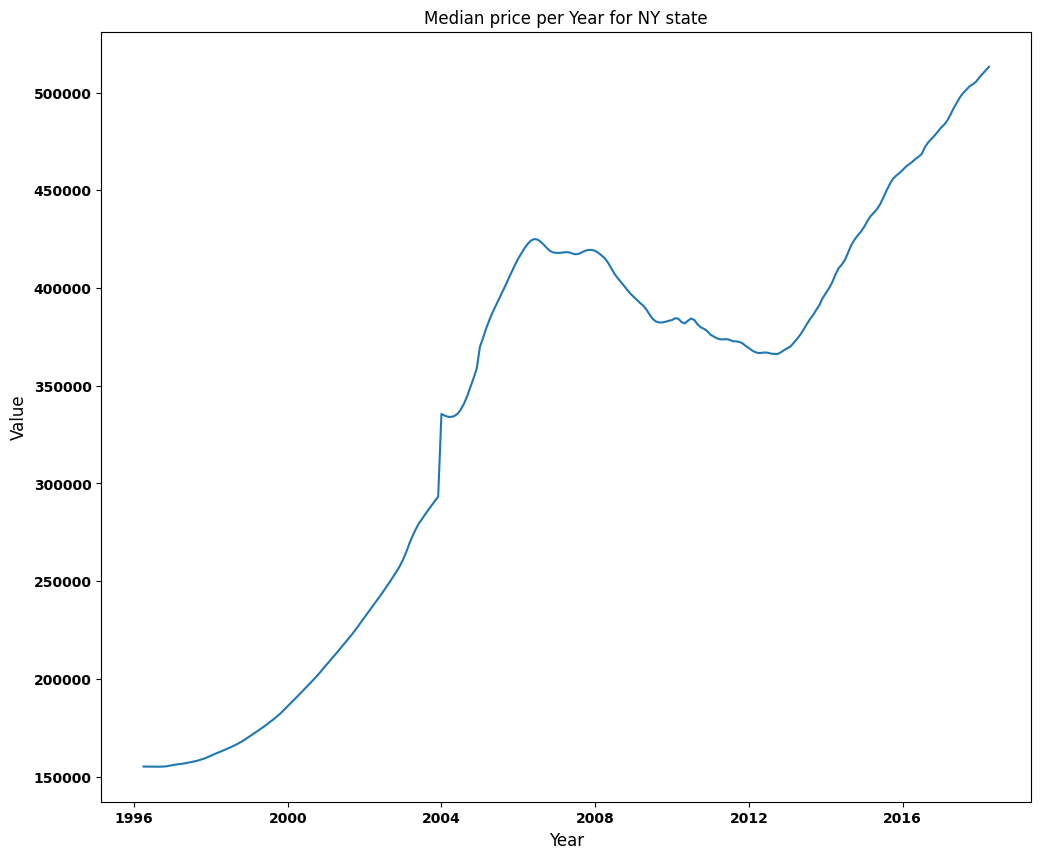

In [ ]:
# NY state
state_data = data[data['State'] == 'NY']
yearly_data = state_data.groupby('Date').agg({'Price': 'mean'})

# Plotting the median prices of washington DC over the years
plt.figure(figsize=(12,10))
plt.plot(yearly_data.index, yearly_data['Price'])

plt.title('Median price per Year for NY state',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Value',fontsize=12)
plt.show()

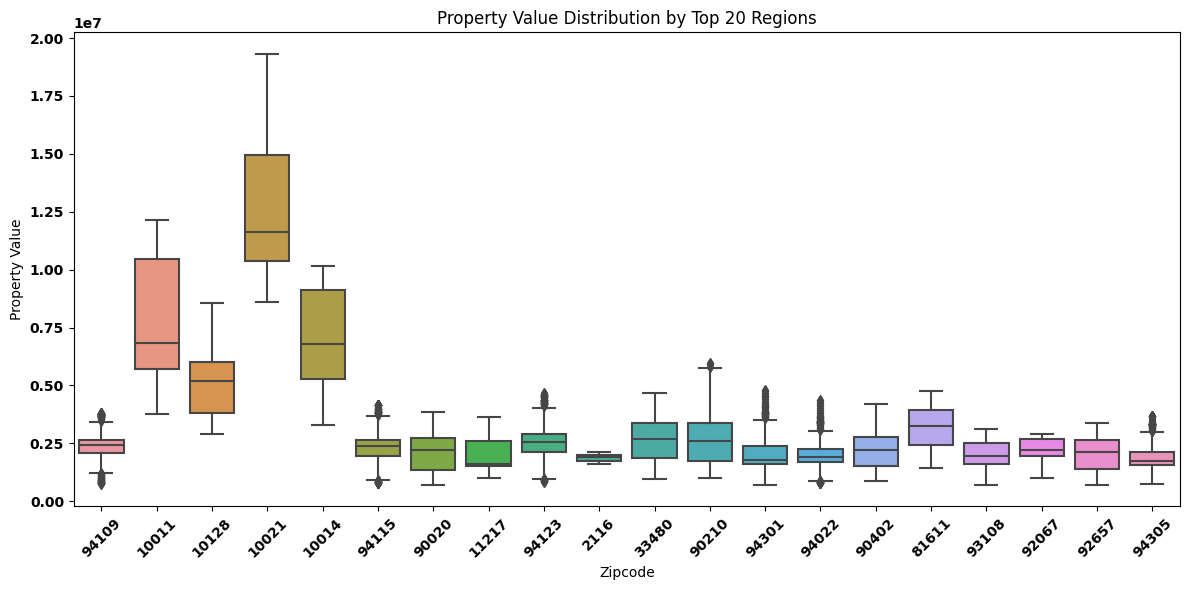

In [ ]:
# Checking For The Outlies

# Box plot
plt.figure(figsize=(12, 6))
top_regions = data.groupby('Zipcode')['Price'].mean().nlargest(20).index
top_data = data[data['Zipcode'].isin(top_regions)]
sns.boxplot(x='Zipcode', y='Price', data=top_data)
plt.title("Property Value Distribution by Top 20 Regions")
plt.xlabel("Zipcode")
plt.ylabel("Property Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The dataset potrays presence of outliers in some zipcodes however this may be a true representation of the prices in the affected locality

## <a id='toc1_4_'></a>[Step 4.Explotary Data Analysis and Visualization](#toc0_)


This section entails examining the relationship between variables using;
* Univariate analysis
* Bivariate analysis
* Multivariate analysis.



### <a id='toc1_4_1_'></a>[4.1 Univariate Analysis](#toc0_)


* Univariate Analysis involves the study of individual variables in isolation, focusing on their distribution and properties without considering the influence of other variables.

* This analytical approach provides a foundational understanding of the characteristics and behavior of a single variable.

**Top 10 Most Popular Counties**


The code below shows the top 10 most popular counties in the dataset

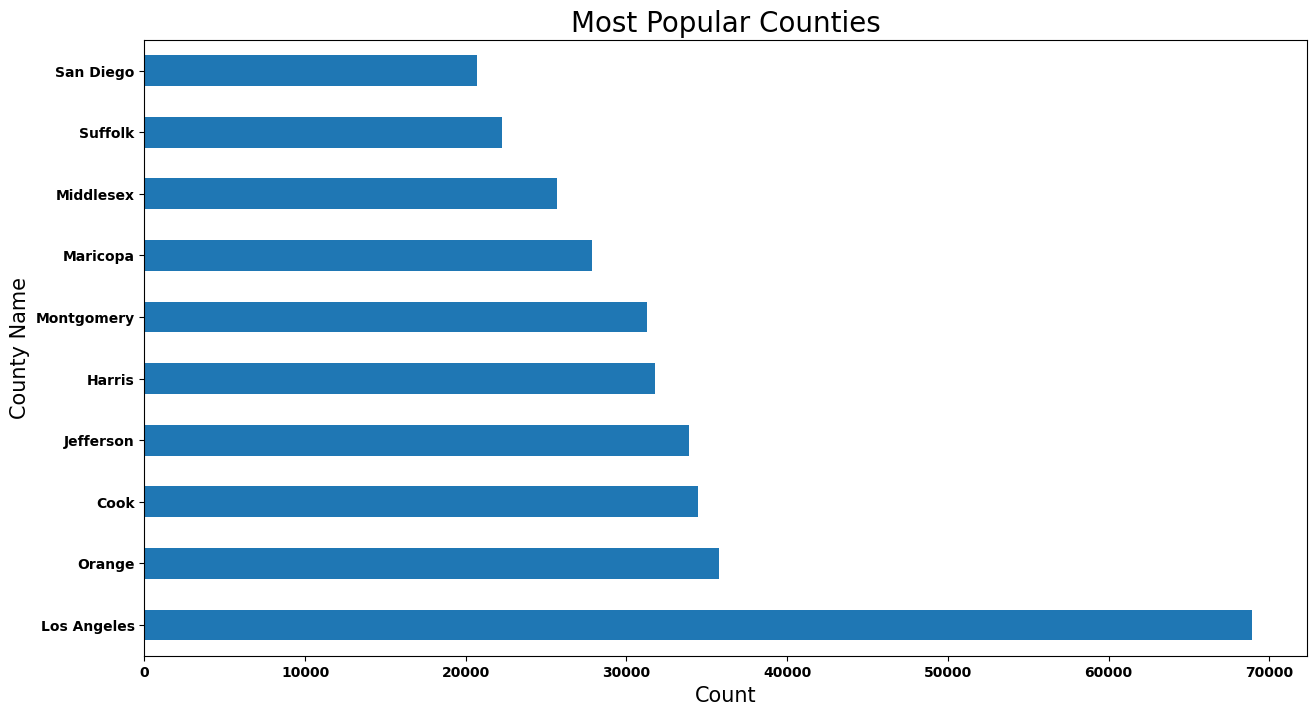

In [ ]:
# # plotting the most popular counties in the dataset
plt.figure(figsize=(15,8))
data.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Most Popular Counties",fontsize=20);

Based on the bar graph above, this shows that Los Angeles is the most popular county with around 70000 zipcodes.Most of the other counties range between 30000 and 50000 zipcodes.

**Top 10 Most Popular States**

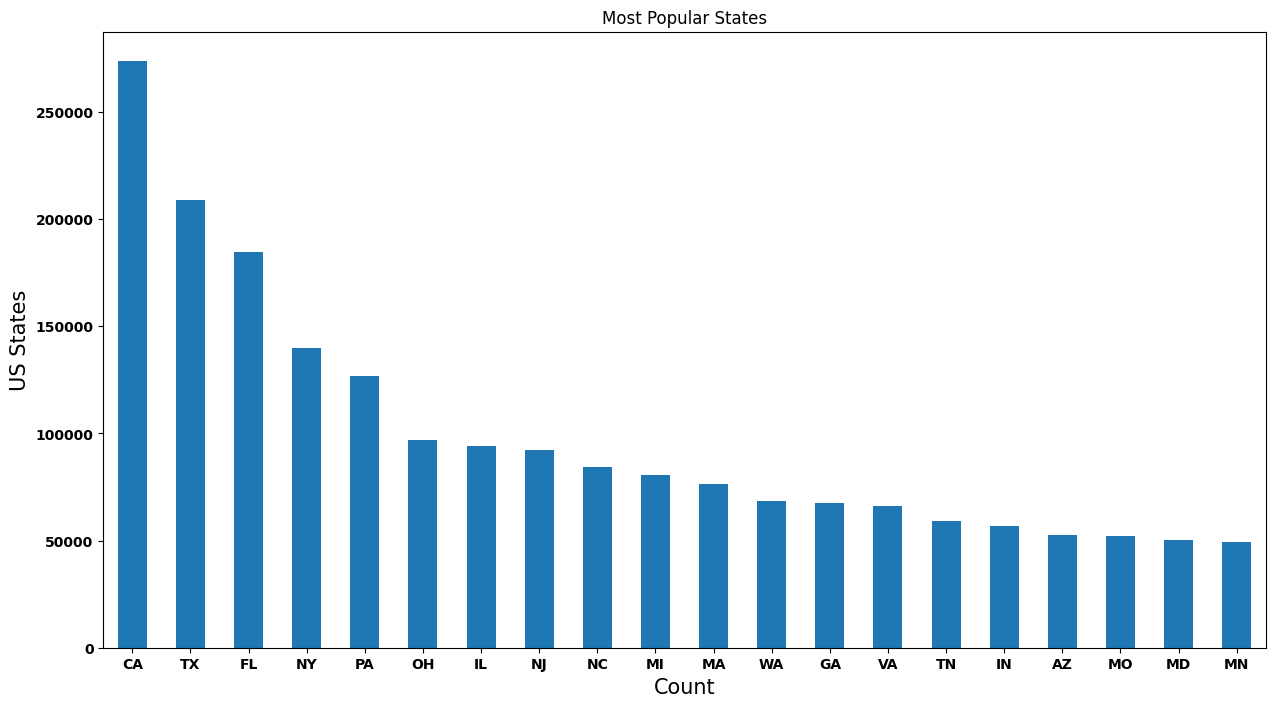

In [ ]:

# plotting the most popular states in the dataset
plt.figure(figsize=(15,8))
data.State.value_counts()[:20].plot(kind="bar")
plt.xlabel("Count",fontsize=15)
plt.ylabel("US States",fontsize=15)
plt.xticks(rotation=0)
plt.title("Most Popular States",fontsize=12);

* The above graph shows that CA is the most popular with above 300000 zipcodes
 followed NY with aound 270000, TA with aound 260000 and others ranges below  250000 zipcodes.

**The Most Popular Cities**

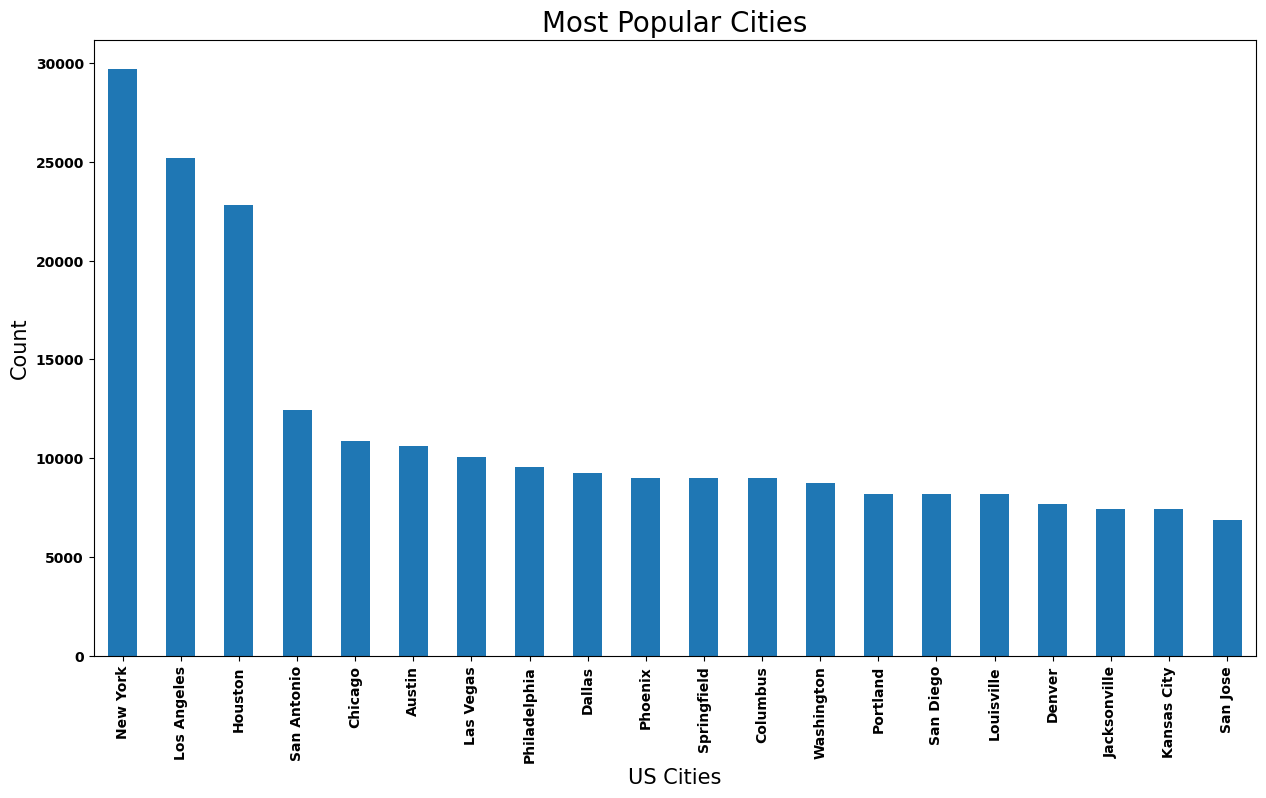

In [ ]:
# plotting the most popular cities in the dataset
plt.figure(figsize=(15,8))
data.City.value_counts()[:20].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

* From the dataset we can deduce that New York City, Los Angeles, and Houston
  are the most popular cities with above 20000 zipcodes. Other cities lie below 15000 zipcodes

**The Distribution of Price**

* The cell below an histogram to check on the distribution of the price dataset

In [ ]:
# calculate the average profit margin for each city
df_avg_value = data.groupby('State').mean().reset_index()

# sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('Price', ascending=False)

# select the top 20 cities by average profit margin
top_states = df_sorted_states['State'].head(20)

# filter the DataFrame to include only the top 20 cities
df_top_states = data[data['State'].isin(top_states)].groupby("State").mean().sort_values("Price",ascending=False)

In [ ]:
#Checking on price descriptive statistics
data["Price"].describe()

count    2.526602e+06
mean     2.255705e+05
std      2.620404e+05
min      8.000000e+00
25%      1.079000e+05
50%      1.601000e+05
75%      2.601000e+05
max      1.931490e+07
Name: Price, dtype: float64

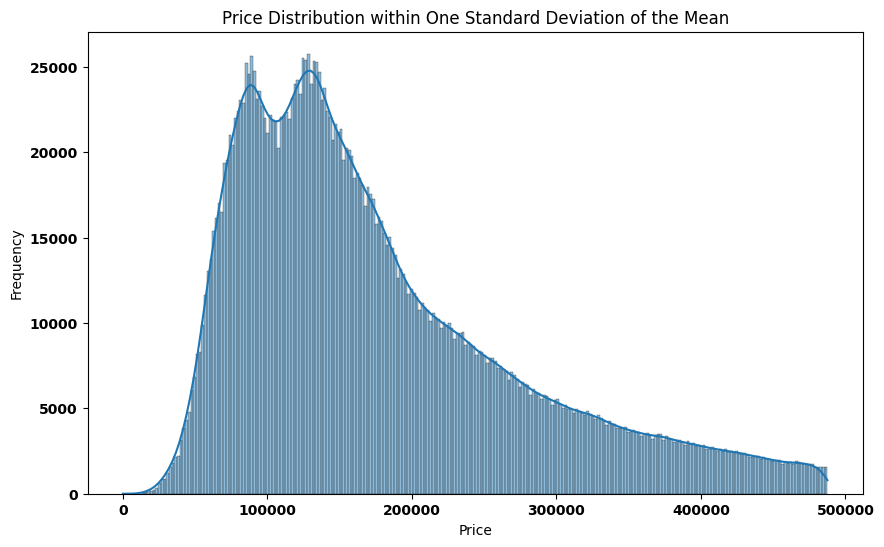

In [ ]:
# # Filter data within one standard deviation of the mean
# filtered_data = data[(data['Price'] >= mean_price - std_price) & (data['Price'] <= mean_price + std_price)]

# # Distribution plot
# plt.figure(figsize=(10, 6))
# sns.histplot(filtered_data['Price'], kde=True)
# plt.title('Price Distribution within the mean')
# plt.xlabel('Price')
# plt.ylabel('Frequency')
# plt.show()


# Calculate mean and standard deviation
mean_price = data['Price'].mean()
std_price = data['Price'].std()

# Filter data within one standard deviation of the mean
filtered_data = data[(data['Price'] >= mean_price - std_price) & (data['Price'] <= mean_price + std_price)]

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Price'], kde=True)
plt.title('Price Distribution within One Standard Deviation of the Mean')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* Based on the above histogram the price dataset is right skewed and most of the prices are below mean_price.

### <a id='toc1_4_2_'></a> [4.2 Bivariate Analysis](#toc0_)

* Under Bivariate analysis, we are checking the relationship between two
  variables within the dataset. Aiming to understand how changes in one variable might affect  changes in another.This will also enable identification of patterns, correlation trends, or dependencies between the variables. Which will provide valuable insights for making decisions.

* Below cell visualize the average housing price trend from year 1996 to 2018

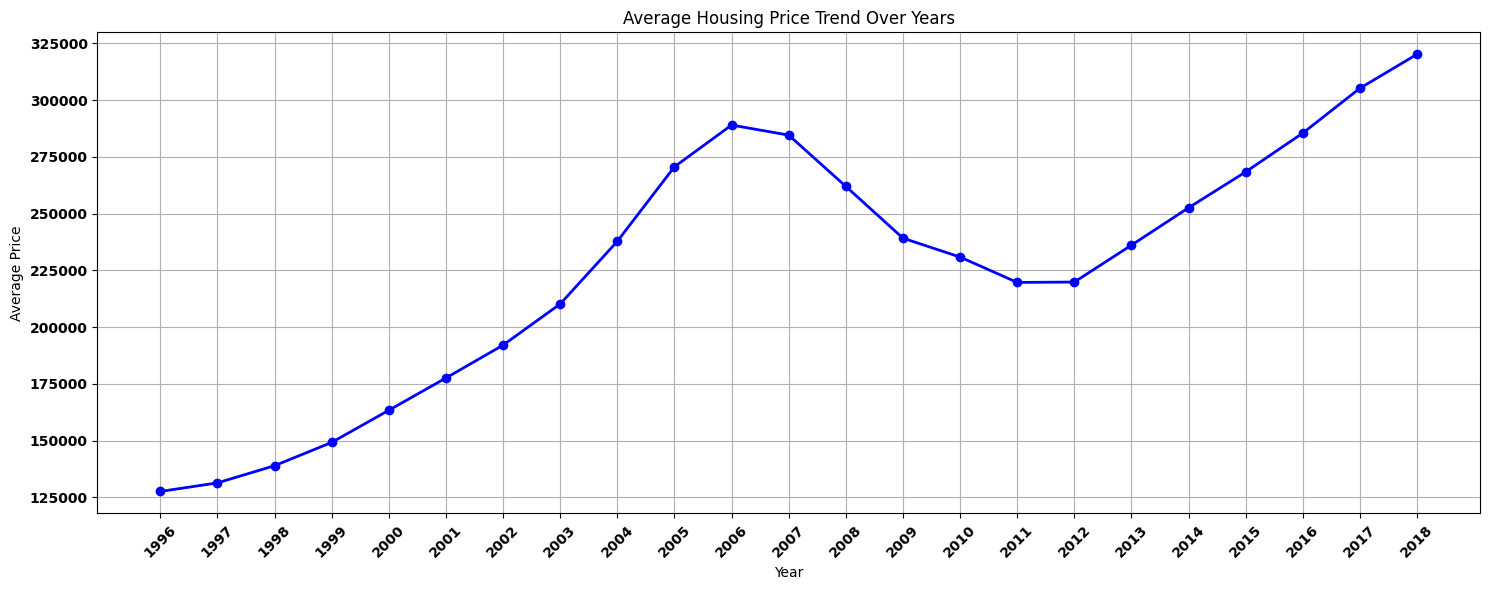

In [ ]:

#Average price over the years

# Calculating average price per year

data['Year'] = data['Date'].dt.year
average_prices = data.groupby('Year')['Price'].mean()
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
# Ploting the data
ax.plot(average_prices.index, average_prices.values, label='Average Price', color='blue', linewidth=2, marker='o')
# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.set_title('Average Housing Price Trend Over Years')
# Adding grid lines
ax.grid(True)
# Customizing x-axis ticks for each year
plt.xticks(average_prices.index, rotation=45)
# Tight layout
plt.tight_layout()
# Show the plot
plt.show()

* The graph shows that the average housing price has been increasing steadily
 over the years, with a dip between 2007 and 2012, during the financial crisis. Since then, the average housing price has rebounded and continued to rise

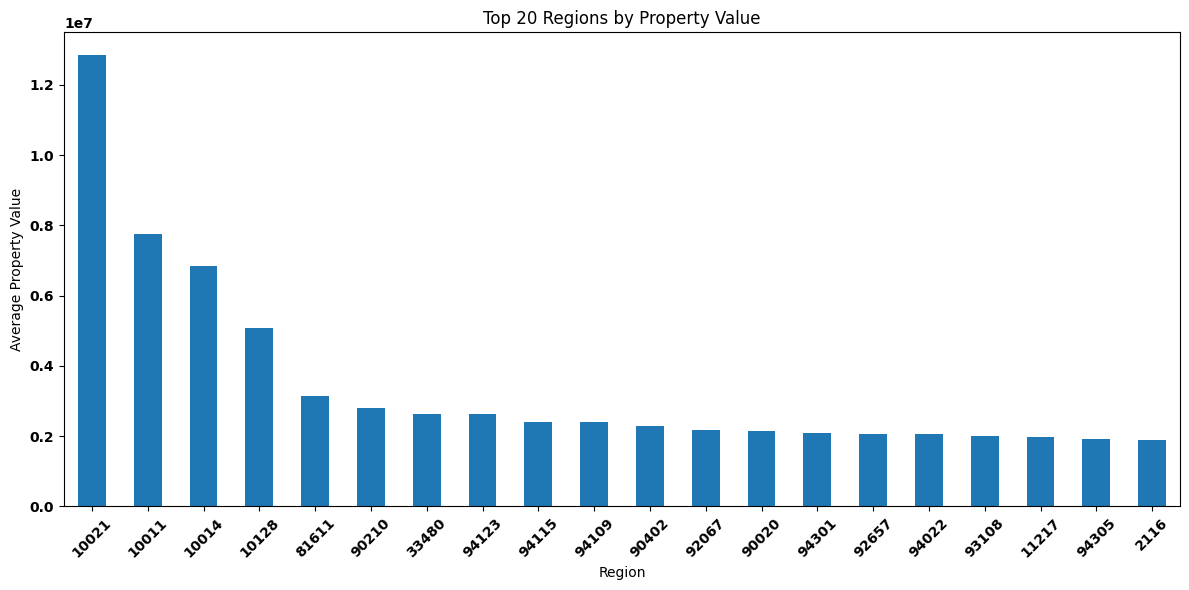

In [ ]:
# Checking on top 20 regions by property prices

plt.figure(figsize=(12, 6))
top_regions = data.groupby('Zipcode')['Price'].mean().nlargest(20)
top_regions.plot(kind='bar')
plt.title("Top 20 Regions by Property Value")
plt.xlabel("Region")
plt.ylabel("Average Property Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Zipcode 10021,10011, 10014, 10128 in New York has properties with the highest
 value, followed by 94027 in California and 81611 in Colorado, and the other remaining Zipcodes range between 2 to 3 Million.

**Top 20 cities by by property value**

* The cell below compute the mean of price and visualizes top 20 cities with
 highest mean value.

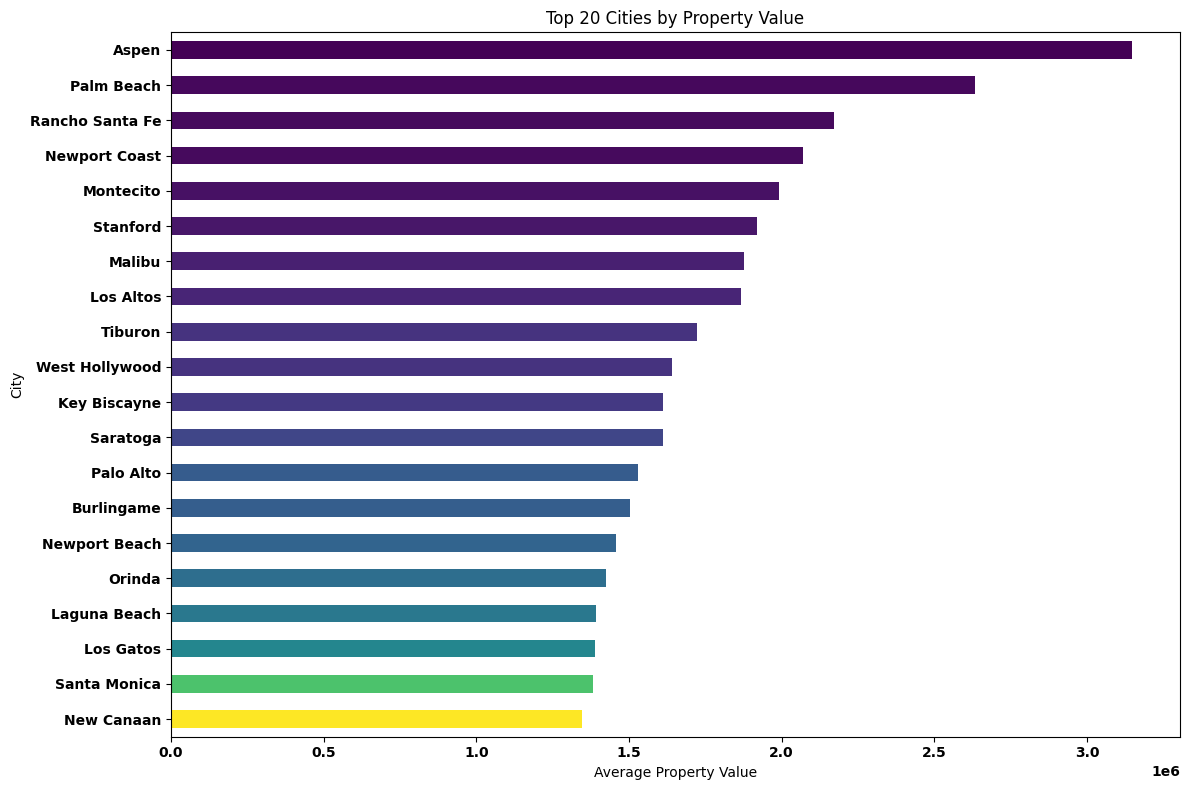

In [ ]:
# #Top 10 Cities by property value
# Calculate the top 20 cities by average property value
top_regions = data.groupby('City')['Price'].mean().nlargest(20)

# Normalize values for coloring
normalized_values = (top_regions - top_regions.min()) / (top_regions.max() - top_regions.min())

# Define a colormap
colormap = plt.cm.get_cmap('viridis')  # You can choose any colormap you prefer

# Generate colors based on normalized values
colors = colormap(normalized_values)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_regions.sort_values().plot(kind='barh', color=colors)
plt.title("Top 20 Cities by Property Value")
plt.xlabel("Average Property Value")
plt.ylabel("City")
plt.tight_layout()
plt.show()

* From the horizontal graph, Palm Beach, Malibu and Los Altos are the  
  properties with the highest property value. Palm Beach with an average price of above 2.5 million. Other cities operates below price of 2 million

**Top 20 Metropolitant cities**

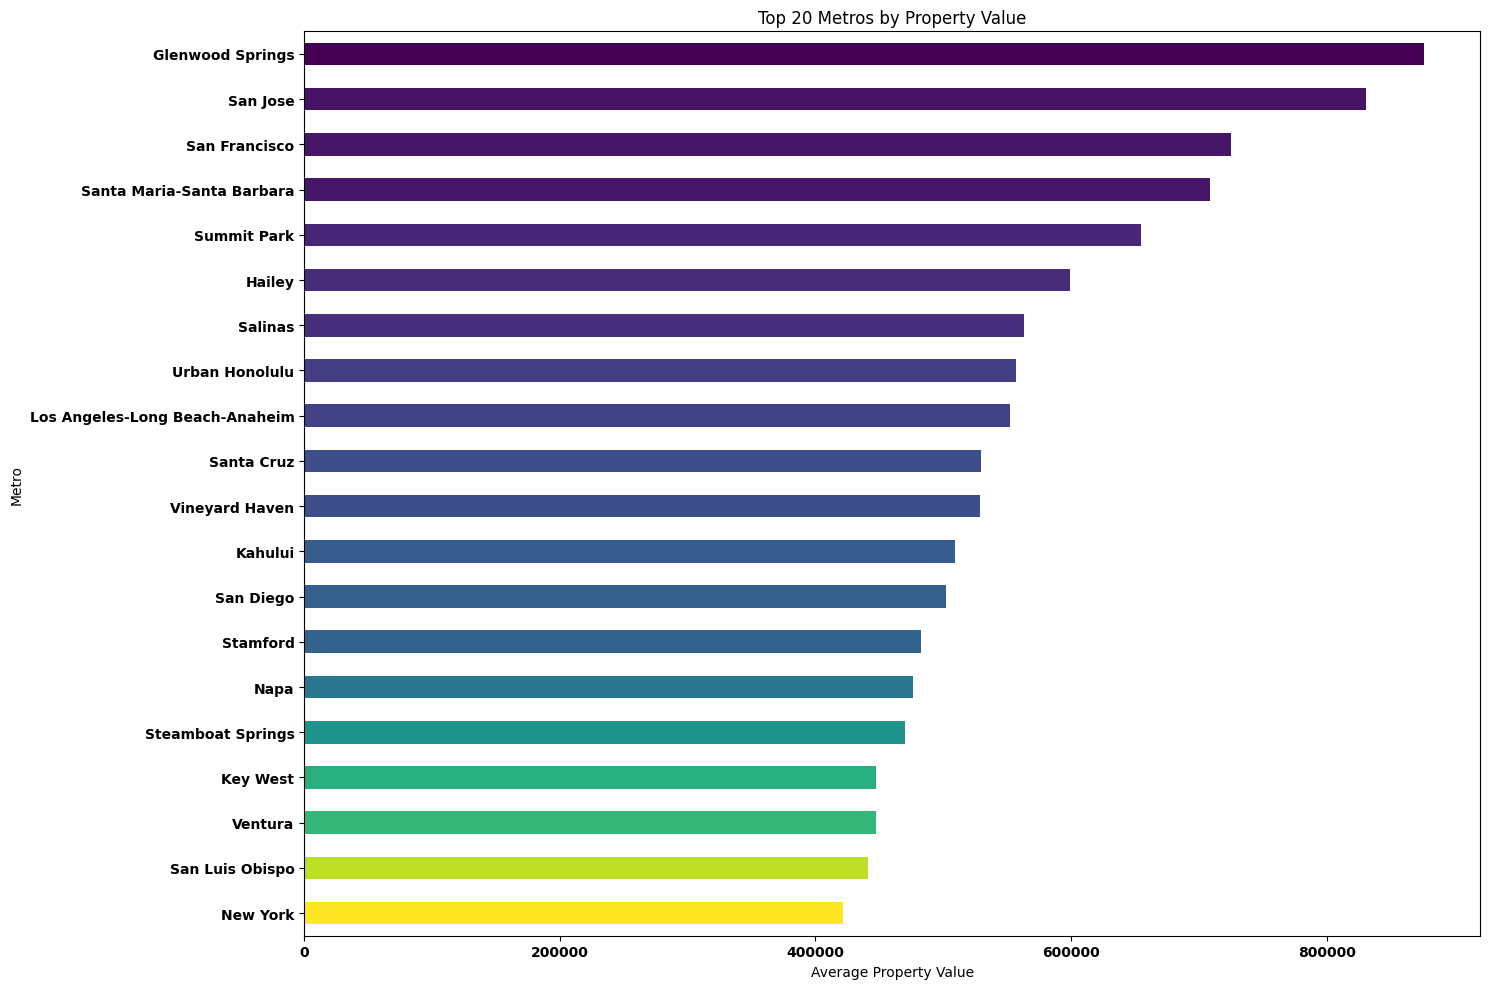

In [ ]:
#Top 10 Metropolitant by price

# Flipped Axes Bar Plot: Property Value vs. Region
plt.figure(figsize=(15, 10))
top_regions = data.groupby('Metro')['Price'].mean().nlargest(20)
normalized_values = (top_regions - top_regions.min()) / (top_regions.max() - top_regions.min())
colors = colormap(normalized_values)

top_regions.sort_values().plot(kind='barh', color=colors)
plt.title("Top 20 Metros by Property Value")
plt.xlabel("Average Property Value")
plt.ylabel("Metro")
plt.tight_layout()
plt.show()

* from the bar graph San Jose and San Francisco are the most metropolitant
  counties with the highest value of the property with an average price above 600000.

**Top 20 County Name**

In [ ]:
# # Top 20 Counties by price

# # Flipped Axes Bar Plot: Property Value vs. Region
# plt.figure(figsize=(15, 10))
# top_regions = data.groupby('CountyName')['Price'].mean().nlargest(20)
# normalized_values = (top_regions - top_regions.min()) / (top_regions.max() - top_regions.min())
# colors = colormap(normalized_values)

# top_regions.sort_values().plot(kind='barh', color=colors)
# plt.title("Top 20 Counties by Property Value")
# plt.xlabel("Average Property Value")
# plt.ylabel("County Name")
# plt.tight_layout()
# plt.show()

**Houses values in top 10 states**

In [ ]:
# calculate the average profit margin for each city
df_avg_value = data.groupby('State').mean().reset_index()

# sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('Price', ascending=False)

# select the top 20 cities by average profit margin
top_states = df_sorted_states['State'].head(10)

# filter the DataFrame to include only the top 20 cities
df_top_states = data[data['State'].isin(top_states)].groupby("State").mean().sort_values("Price",ascending=False)

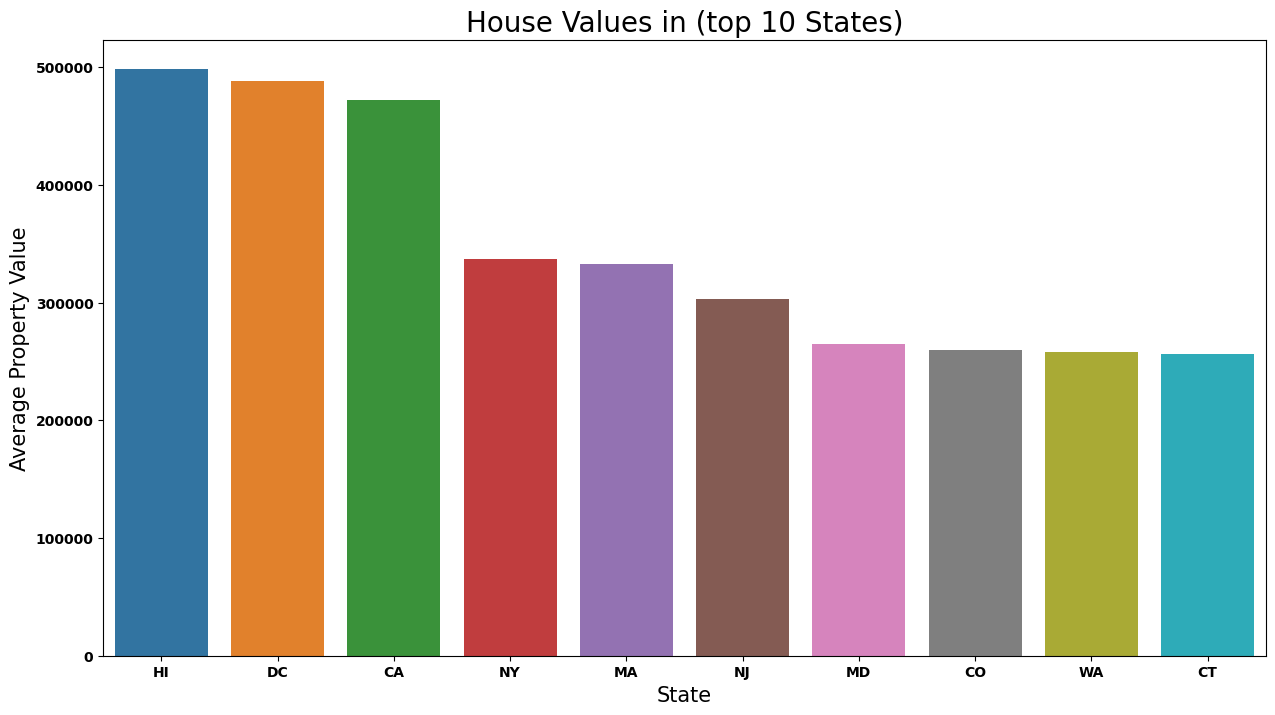

In [ ]:
# create a bar plot of city vs. profit margin
fig,ax = plt.subplots(figsize=(15,8))
sns_plot = sns.barplot(x=df_top_states.index, y=df_top_states.Price,ax=ax)

# set the title and axis labels
ax.set_title('House Values in (top 10 States)',fontsize=20)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Average Property Value',fontsize=15)

# display the plot
plt.show();

* from the bar graph, its noted that HI, DC and CA arethe top 3 states with the
  house property value above 4000000. Most of the others states operates with house value of below 4000000

**Return On Investement By Zipcodes**

* The code belowgroup the zipcodes by Return On Investment percentage, picks  
 the zipcodes with the highest property value and visualize.

In [ ]:
# grouping data by mean %ROI and selecting top 30 zipcodes
grouped1 = data.groupby('Zipcode')
state_values1 = grouped1['%ROI'].mean()
state_values_df1 = state_values1.reset_index(name='% ROI')
state_values_df1 = state_values_df1.sort_values(by='% ROI', ascending=False)
top_thirty_zipcodes_df_roi = state_values_df1.head(10)

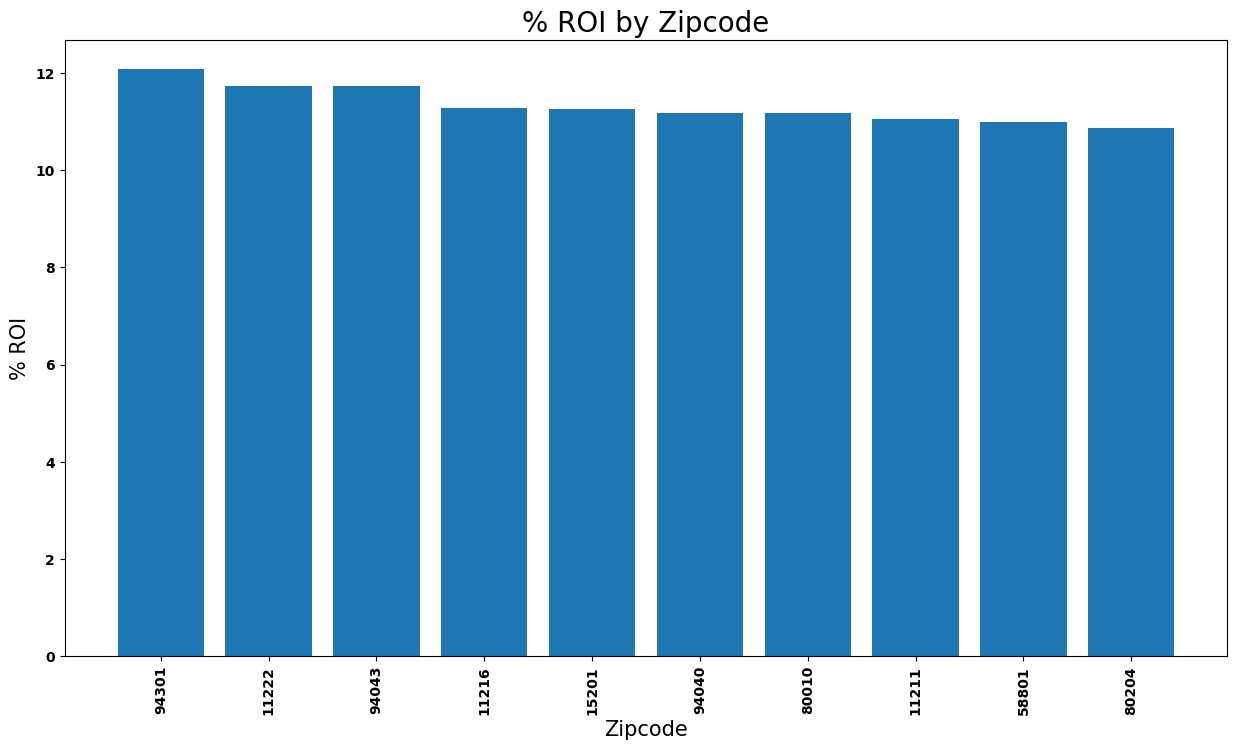

In [ ]:
# plotting the %ROI by zipcode
plt.figure(figsize=(15,8))
plt.bar(top_thirty_zipcodes_df_roi['Zipcode'], top_thirty_zipcodes_df_roi['% ROI'])
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('% ROI',fontsize=15)
plt.title('% ROI by Zipcode',fontsize=20)
plt.xticks(rotation=90)
plt.show()

* From this graph, zipcode 94301 seems to be the most profitable zipcode at 12%
  ROI from 2009 to 2018.

### <a id='toc1_4_3_'></a>[4.3 Multivariate Analysis](#toc0_)

* This section seeks to understand relationships among three or more variables
  within a dataset.It also aims to uncover patterns, trends, and underlying structures that might not be evident when considering variables in isolation. By considering multiple variables together,we gain a more comprehensive understanding of complex systems and can make more nuanced predictions and informed decisions.

In [ ]:
data.head()

,RegionID,Zipcode,SizeRank,City,State,Metro,CountyName,%ROI,ROIPrice,Date,Price,Year
0,84654,60657,1,Chicago,IL,Chicago,Cook,2.596098,212299.0,1996-04-01,334200.0,1996
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,5.287075,119399.0,1996-04-01,235700.0,1996
2,91982,77494,3,Katy,TX,Houston,Harris,3.281773,83199.0,1996-04-01,210400.0,1996
3,84616,60614,4,Chicago,IL,Chicago,Cook,2.296917,241599.0,1996-04-01,498100.0,1996
4,93144,79936,5,El Paso,TX,El Paso,El Paso,-0.009141,-101.0,1996-04-01,77300.0,1996


**Top states based on average prices over years**

The cell below seeks to visualize top states with the highest property valuve over a period of time.

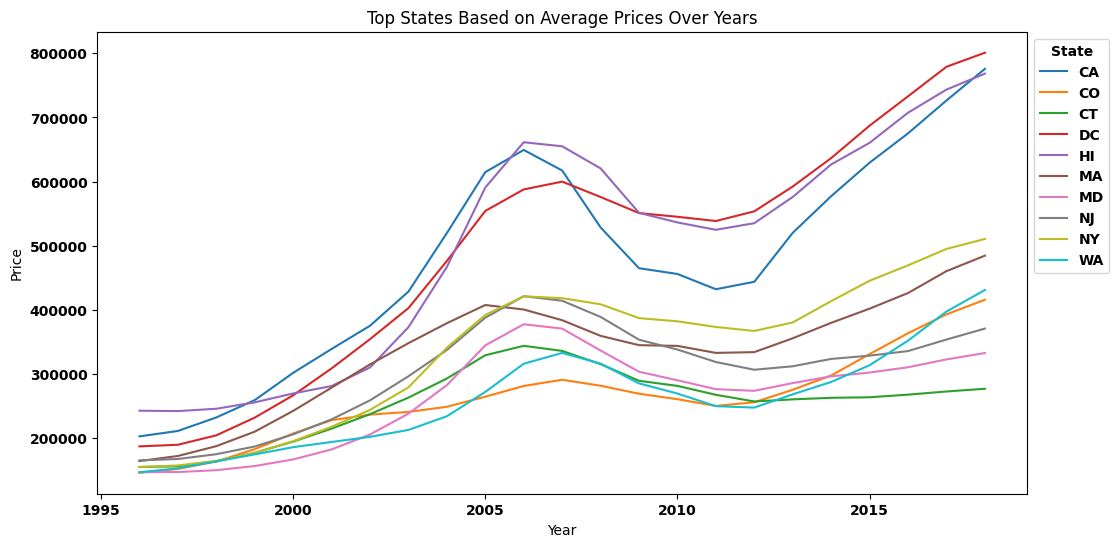

In [ ]:
#Checking top 10 states based on average prices per year

# Calculate average prices by state
average_prices_by_state = data.groupby(['Year', 'State'])['Price'].mean().reset_index()

# Get top states based on average prices
top_states = average_prices_by_state.groupby('State')['Price'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only top states
df_top_states = average_prices_by_state[average_prices_by_state['State'].isin(top_states)]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price', hue='State', data=df_top_states, ci=None)
plt.title('Top States Based on Average Prices Over Years')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.show()

* As observed, the percentage of return on investents for the top ten states  
  had a crash in 2008 to 2012 and then from there they all have an upward linear trend. This also depicts the rising trent has been from 2012 onwards meaning 2018 remains highest in terms of investments returns.

**Top zipcodes Based on Average Prices Over Years**

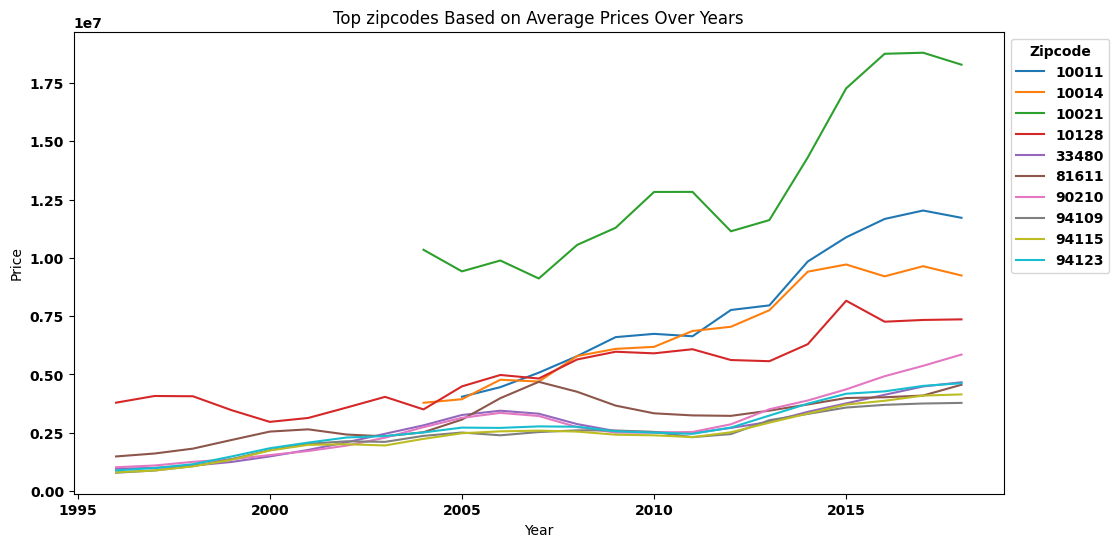

In [ ]:
#Checking top 10 Zipcodes based on average prices per year

# Calculate average prices by state
average_prices_by_zipcode = data.groupby(['Year', 'Zipcode'])['Price'].mean().reset_index()

# Get top states based on average prices
top_zipcodes = average_prices_by_zipcode.groupby('Zipcode')['Price'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only top states
df_top_zipcodes = average_prices_by_zipcode[average_prices_by_zipcode['Zipcode'].isin(top_zipcodes)]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price', hue='Zipcode', data=df_top_zipcodes, ci=None)
plt.title('Top zipcodes Based on Average Prices Over Years')
plt.legend(title='Zipcode', bbox_to_anchor=(1, 1))
plt.show()

* From the above trend curve the zip code 10021 remains high in terms of
  valuation. over time there has been slight rising of prices in other zipcodes as from 2012 upto year 2018

**House prices from 1996 to 2018**

In [ ]:
# creating a data series to check the prices of houses over time
ts = data.copy()
ts.set_index("Date",inplace=True)
ts = ts["Price"]

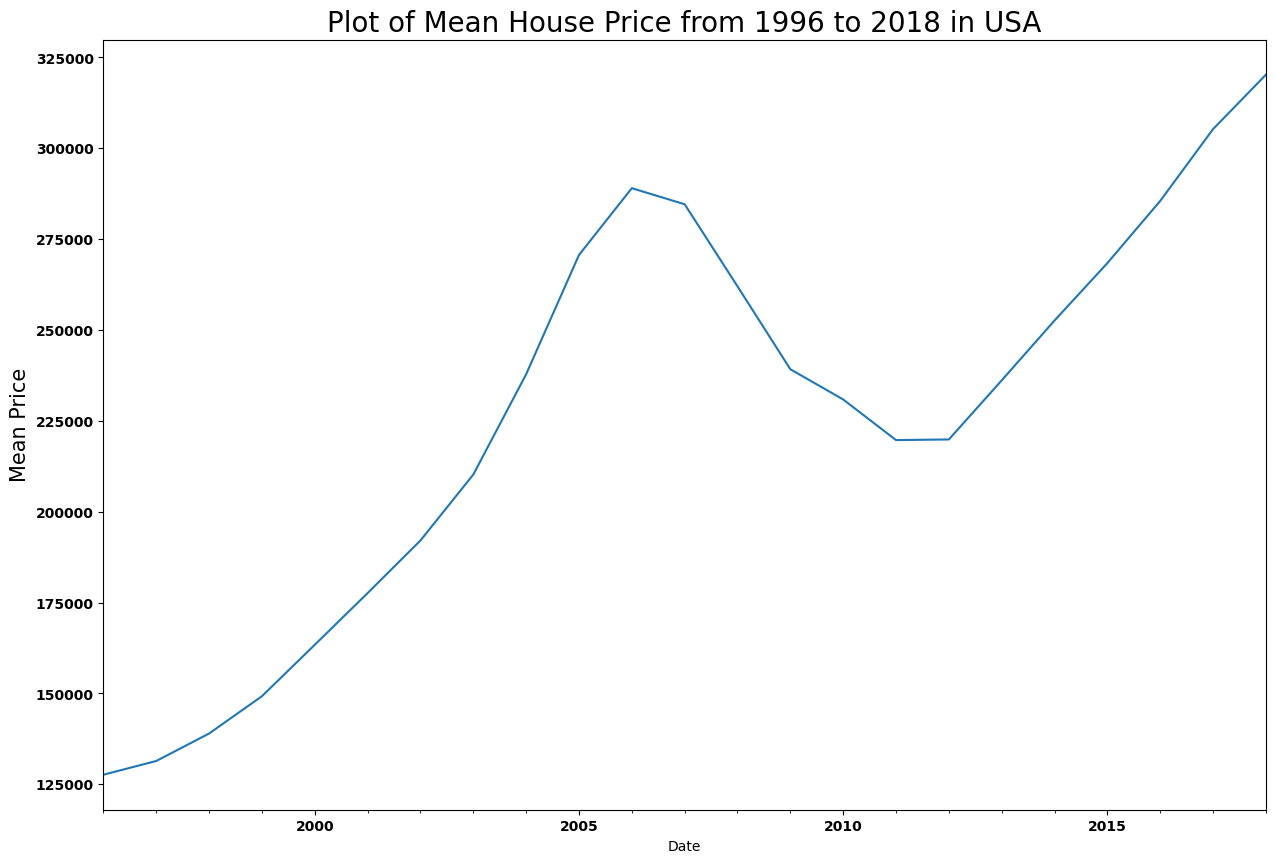

In [ ]:
# plotting mean house price
plt.figure(figsize=(15,10))
ts.resample("A").mean().plot()
plt.ylabel("Mean Price",fontsize=15)
plt.title("Plot of Mean House Price from 1996 to 2018 in USA",fontsize=20);


* This shows that the house price had been trending upwards from 1996-2008  
  until the house market crash where the house prices drastically went down and stabilised around 2012. After this the house price has been trending upwards once again till 2018.

**Home Prices by Zipcode**

* The code below filters the best 5 zipcodes based on return on investment and
 visualize the result from 1996 to 2018 tp show the trend.

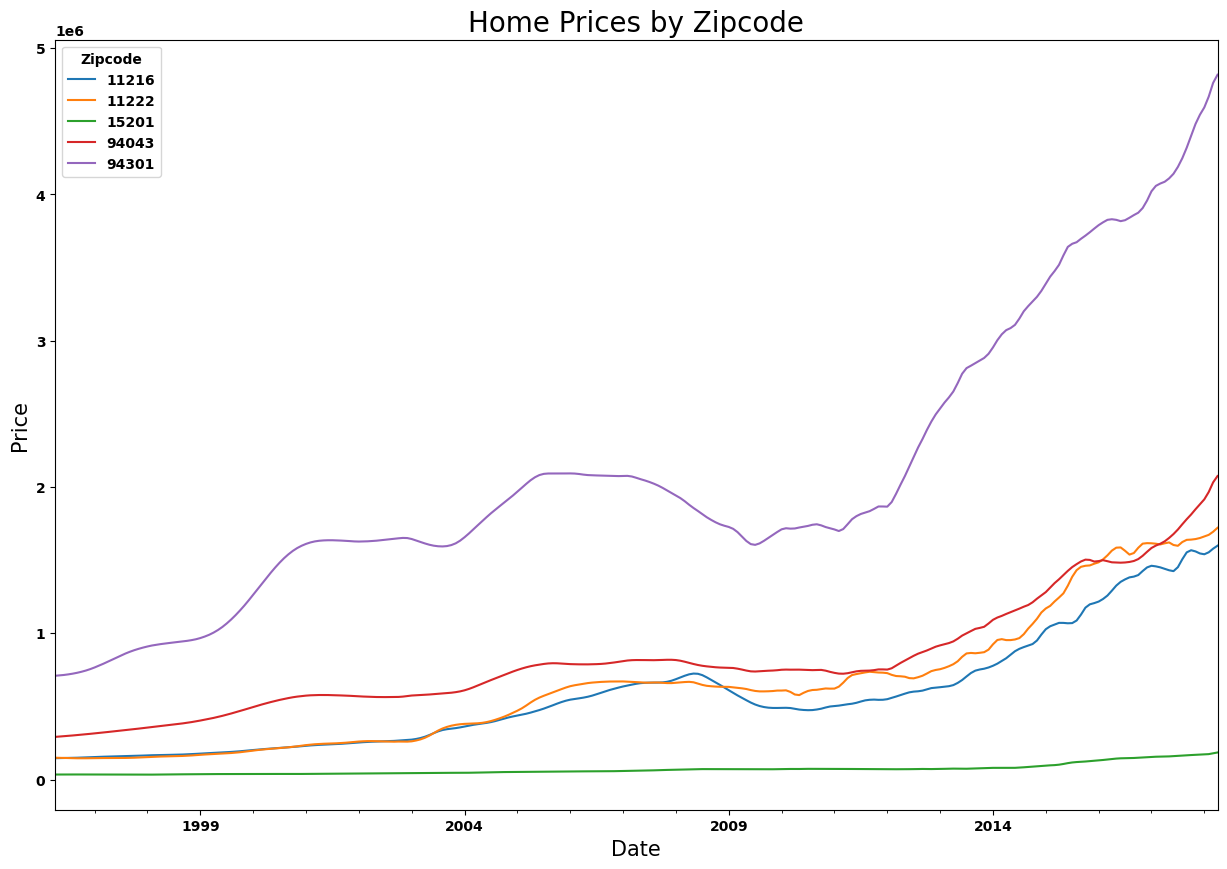

In [ ]:
# Filter data for the top 5 zipcodes based on %ROI
zipcodes = data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = data[data['Zipcode'].isin(zipcodes)]

# Group data by date and zipcode, and calculate the mean price for each group
grouped = top_5.groupby(['Date', 'Zipcode']).mean().reset_index()

# Pivot the data to get the zipcodes as columns and the dates as rows
pivoted = grouped.pivot(index='Date', columns='Zipcode', values='Price')

# Plot the data as a line graph
pivoted.plot(kind='line', figsize=(15,10))
plt.title('Home Prices by Zipcode',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

* Based on  the observation above, its notice that zipcodes potrays steady rise
  from 1996 with low fluctuations. from 2008 there has been decline and from 2012 steady rise is witnessed. 94301 remains the zipcode with higher reurn than the other 5 zipcodes. .

## <a id='toc1_5_'></a>[Step 5.Data Preprocessing](#toc0_)
When working with time series models, it's crucial to assume that the data is stationary. This assumption implies that the mean, variance, and autocorrelation of the data remain constant over time for each lag.

Stationary time series data is essential for efficient model development. Prior to modeling, a thorough assessment of data stationarity will be conducted using the following methods:

1. Dickey-Fuller Test: The Dickey-Fuller test will be employed to assess the stationarity of the data. This statistical test helps determine if a unit root is present in the series, which is indicative of non-stationarity.

2. Rolling Mean Analysis: Additionally, a rolling mean analysis will be performed. This involves calculating the mean over a sliding window of observations. Fluctuations in the rolling mean indicate non-stationarity.

In cases where the data is identified as non-stationary, a differencing technique will be applied. Differencing involves computing the difference between consecutive observations. This process helps transform the data into a stationary form, enabling more accurate modeling and analysis.

## <a id='toc1_5_1'></a>[Step 5.1 Checking for Stationarity](#toc0_)


In [ ]:
# Filter data for the top 5 zipcodes based on %ROI
zipcode = data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = data[data['Zipcode'].isin(zipcode)]

# Group data by date and zipcode, and calculate the mean price for each group and selecting from 2012
grouped_5 = top_5.groupby(['Date', 'Zipcode']).mean().reset_index()
final_df = grouped_5[grouped_5.Date >= "2005-01-01"]

final_df.head()

,Date,Zipcode,RegionID,SizeRank,%ROI,ROIPrice,Price,Year
525,2005-01-01,11216,62027.0,476.0,11.281218,987799.0,437500.0,2005.0
526,2005-01-01,11222,62033.0,1156.0,11.743229,1087499.0,470800.0,2005.0
527,2005-01-01,15201,63932.0,6564.0,11.258385,114299.0,52000.0,2005.0
528,2005-01-01,94043,97530.0,2581.0,11.729368,1310199.0,749200.0,2005.0
529,2005-01-01,94301,97691.0,5739.0,12.076632,3091499.0,1967900.0,2005.0


In [ ]:
TS_zc5 = final_df.drop(['RegionID', 'SizeRank', '%ROI', 'ROIPrice'],axis=1)

TS_zc5 = TS_zc5.set_index('Date')
print('Time series data for the 5 zipcodes:\n',TS_zc5.head())

#Create individualized time series for each zipcode.
#List containing the 5 different time series.
df_ts = []
for zipcode in TS_zc5.Zipcode.unique():
    # Create separate dataframes for each zipcode with a monthly frequency.
    df_zip = TS_zc5[TS_zc5['Zipcode']==zipcode].asfreq('MS')
    df_ts.append(df_zip)
print('\nZipcode 48894 time series:')
df_ts[0].head()

Time series data for the 5 zipcodes:
            Zipcode      Price    Year
Date                                 
2005-01-01   11216   437500.0  2005.0
2005-01-01   11222   470800.0  2005.0
2005-01-01   15201    52000.0  2005.0
2005-01-01   94043   749200.0  2005.0
2005-01-01   94301  1967900.0  2005.0

Zipcode 48894 time series:


,Zipcode,Price,Year
Date,,,
2005-01-01,11216,437500.0,2005.0
2005-02-01,11216,443300.0,2005.0
2005-03-01,11216,450000.0,2005.0
2005-04-01,11216,457700.0,2005.0
2005-05-01,11216,466200.0,2005.0


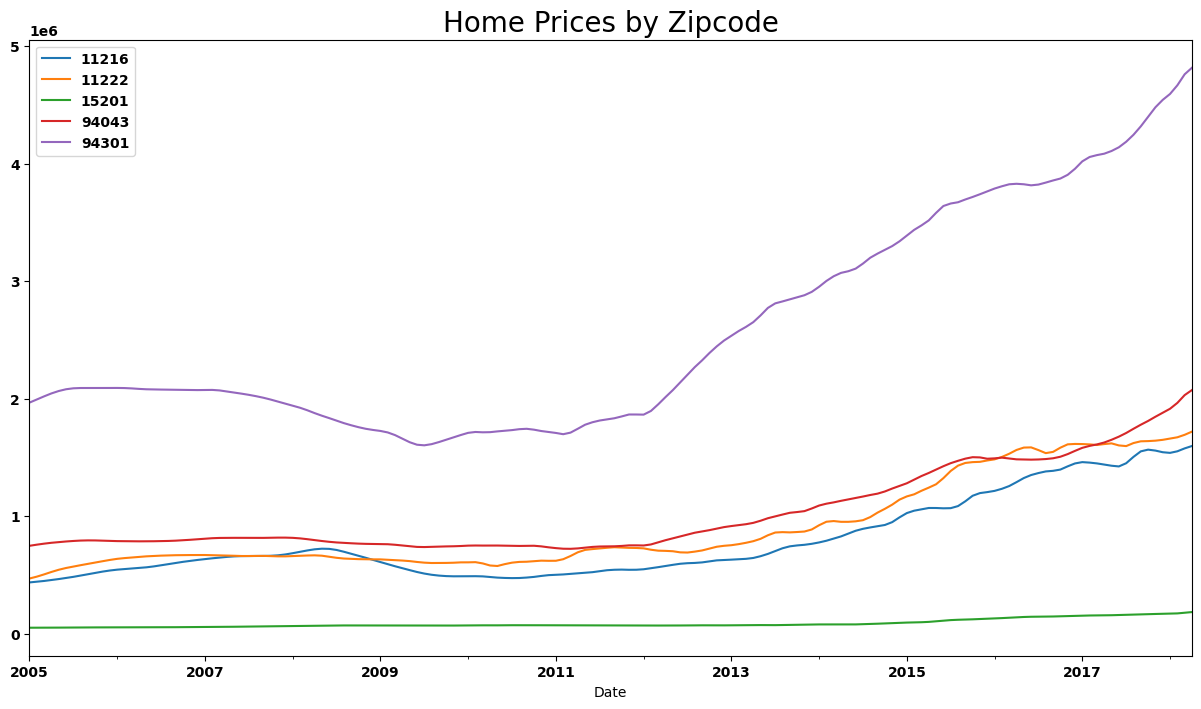

In [ ]:
# plotting home prices by zipcodes
for i in range(5):
    df_ts[i].Price.plot(label=df_ts[i].Zipcode[0],figsize=(15,8))
    plt.legend()
plt.title("Home Prices by Zipcode",fontsize=20);

* It can be observed like before that there was a dip in the prices due to the
  2008 market crash and then the prices continued to rise over time from 2012  
  all the way to 2018.

* A new column called ret is created to check the returns per month

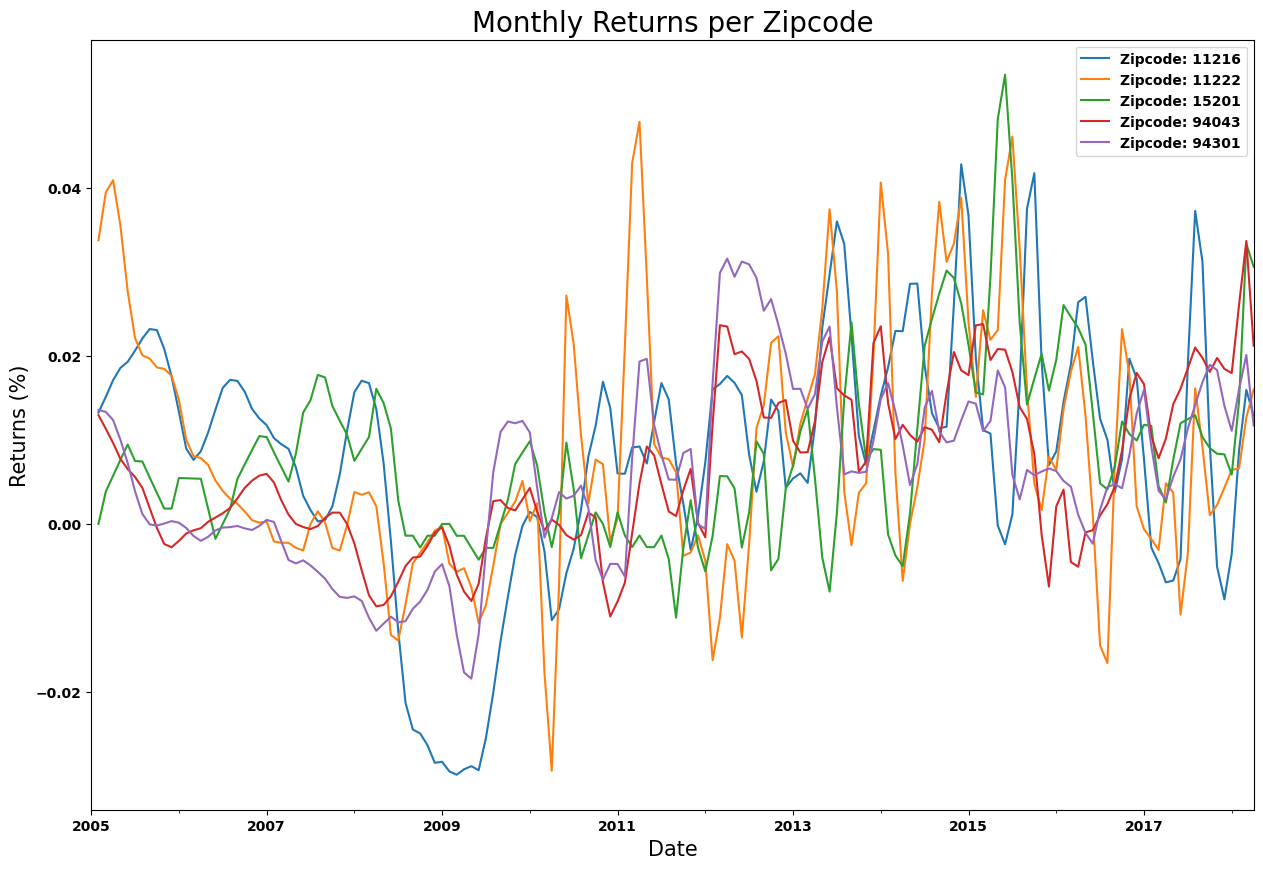

In [ ]:
# creating a column called "ret" representing monthly returns on investment
for zc in range(len(df_ts)):
    df_ts[zc]['ret']=np.nan*len(df_ts[zc])
    for i in range(len(df_ts[zc])-1):
        df_ts[zc]['ret'][i+1]= (df_ts[zc].Price.iloc[i+1] / df_ts[zc].Price.iloc[i]) - 1

#Plot the monthly returns of each zipcode
for i in range(len(df_ts)):
    df_ts[i].ret.plot(figsize=(15,10),label=f"Zipcode: {df_ts[i].Zipcode[0]}")
    plt.title(f'Monthly Returns per Zipcode',fontsize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Returns (%)',fontsize=15)
    plt.legend(loc='best')

* From the obesrvation there is no clear trend which could indicate
  stationarity. The data seemes to noo_stationary.This calls for further tests to be carried out to determine this.

**Rolling Mean to check for stationarity**

* Below code generates visualization to check for stationarity of the five
 zipcodes

ADF Test Results for Zipcode: 11216
Test Statistic: -2.392854023179097
p-Value: 0.1437634741445093
Used Lags: 8
Observations: 150
Critical Values:
   1%: -3.474714913481481
   5%: -2.881008708148148
   10%: -2.5771508444444446


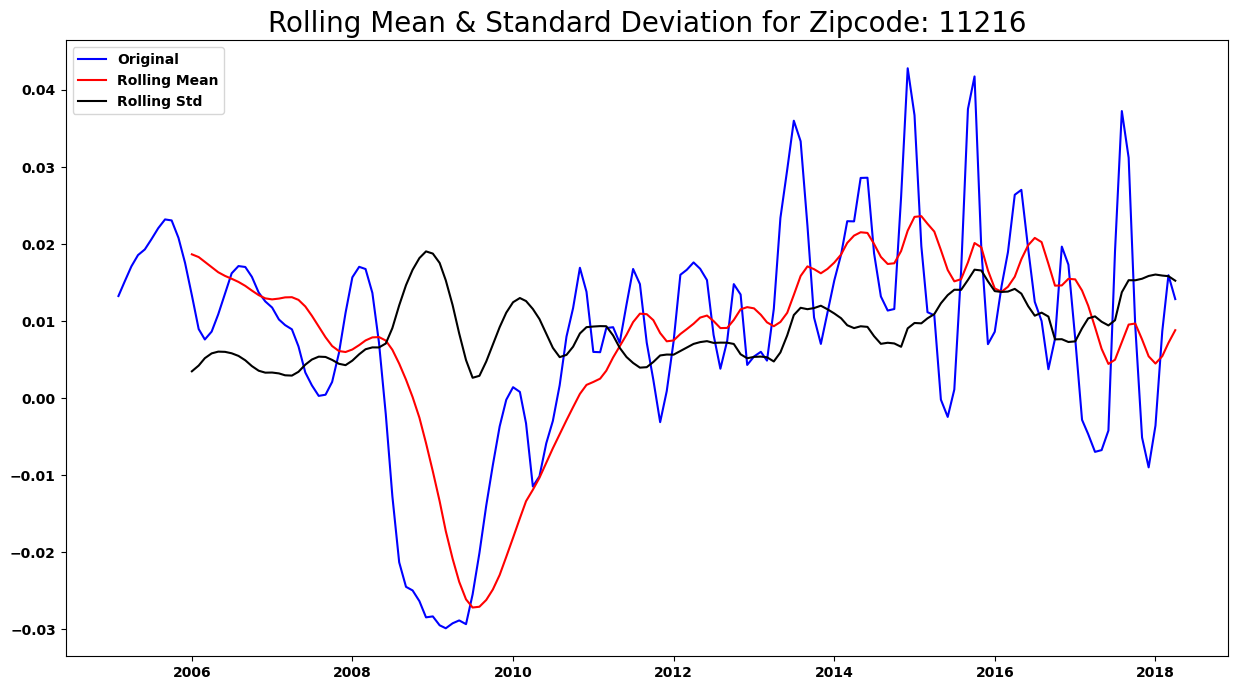

ADF Test Results for Zipcode: 11222
Test Statistic: -2.5337723538387587
p-Value: 0.10747185863642217
Used Lags: 14
Observations: 144
Critical Values:
   1%: -3.476597917537401
   5%: -2.8818291230495543
   10%: -2.5775887982253085


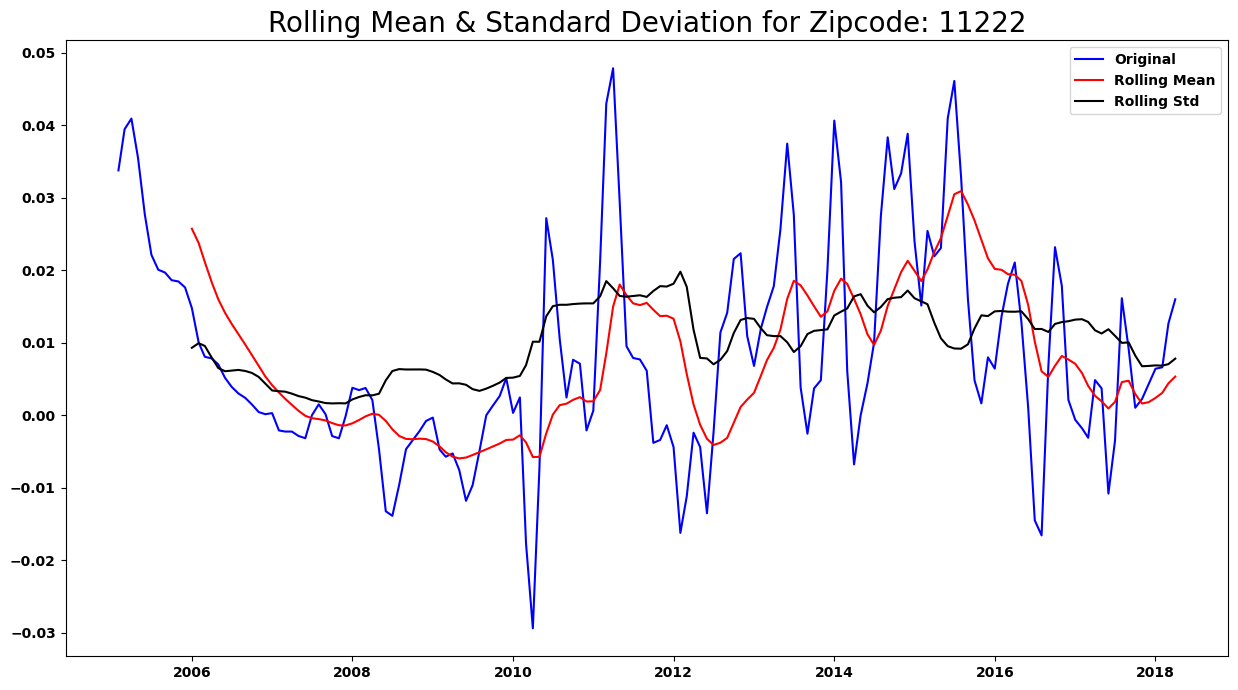

ADF Test Results for Zipcode: 15201
Test Statistic: -2.597050991676003
p-Value: 0.09360830058315467
Used Lags: 12
Observations: 146
Critical Values:
   1%: -3.4759527332353084
   5%: -2.881548071241103
   10%: -2.577438765246763


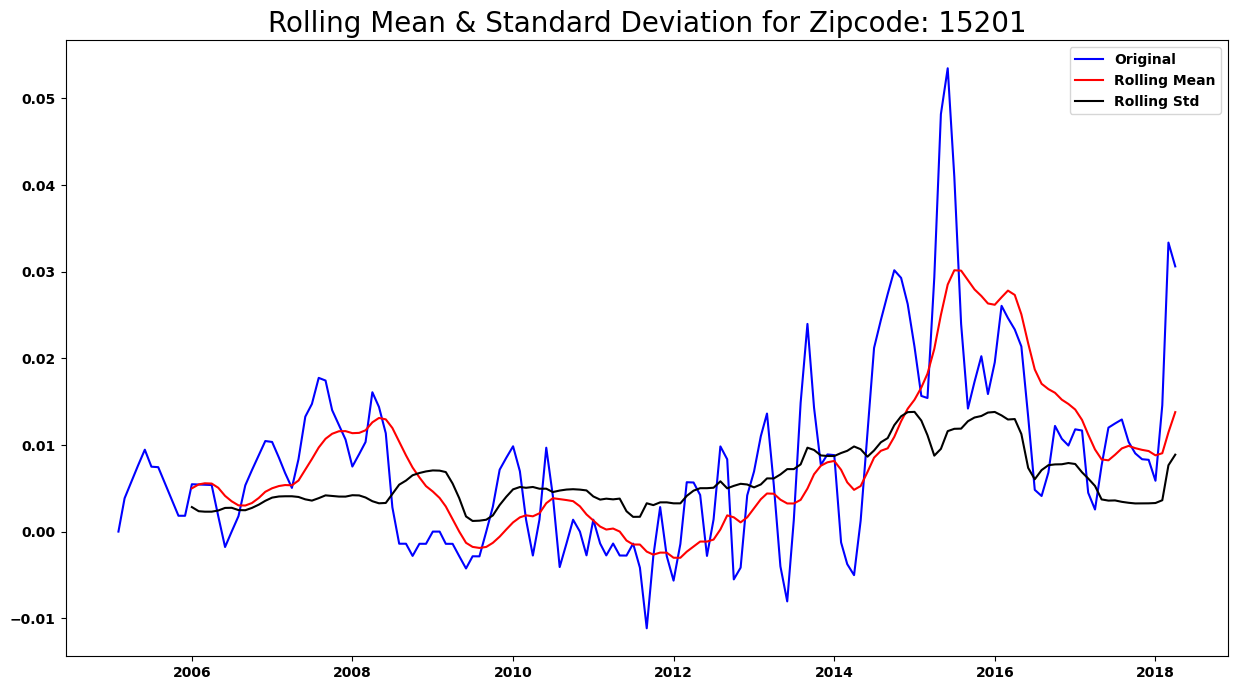

ADF Test Results for Zipcode: 94043
Test Statistic: -1.7646577754670028
p-Value: 0.3981438485942507
Used Lags: 13
Observations: 145
Critical Values:
   1%: -3.476273058920005
   5%: -2.881687616548444
   10%: -2.5775132580261593


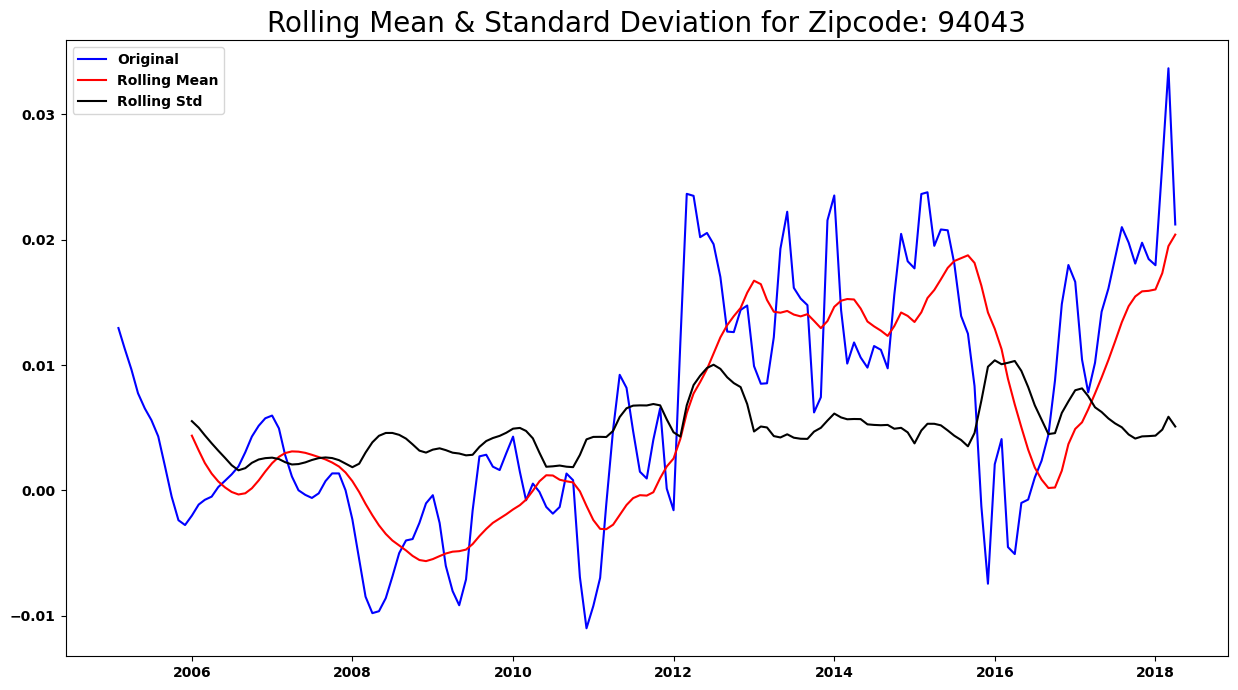

ADF Test Results for Zipcode: 94301
Test Statistic: -1.979617475278643
p-Value: 0.29558100750594096
Used Lags: 13
Observations: 145
Critical Values:
   1%: -3.476273058920005
   5%: -2.881687616548444
   10%: -2.5775132580261593


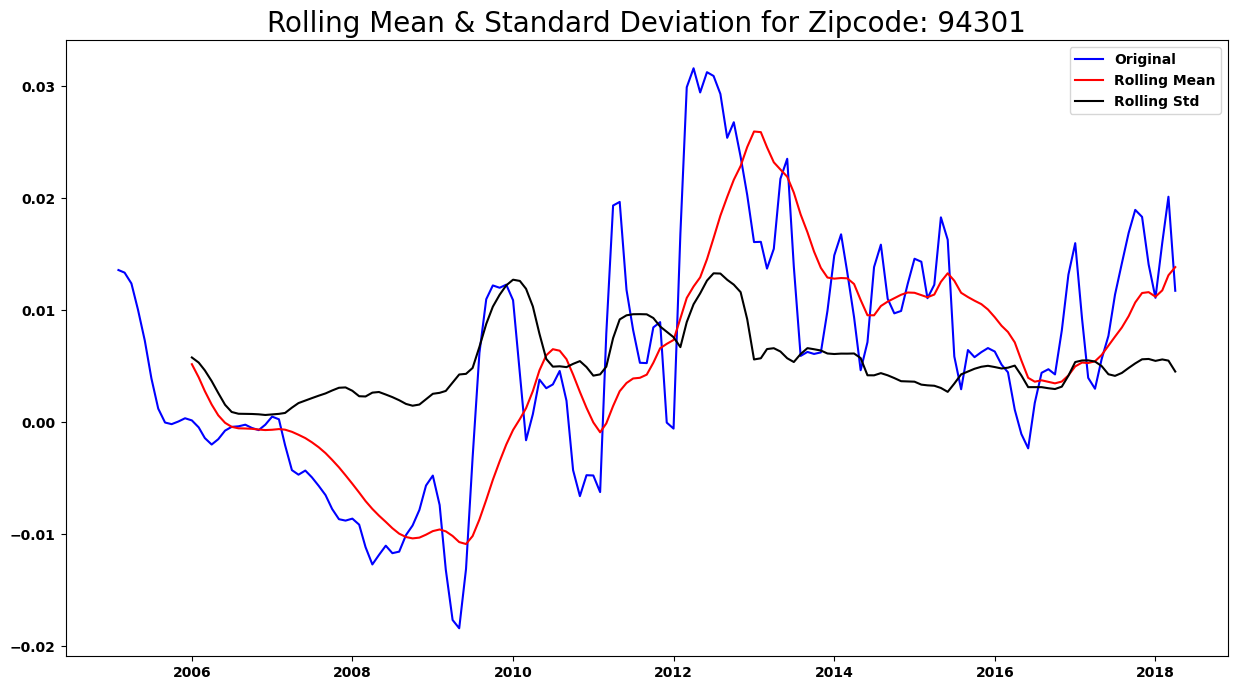

In [ ]:
# Testing for stationarity of the zipcodes

from statsmodels.tsa.stattools import adfuller

# Plot each of the zipcodes’ returns with their respective rolling mean and rolling standard deviation
for i in range(len(df_ts)):
    rollingmean = df_ts[i].ret.rolling(window=12, center=False).mean()
    rollingstd = df_ts[i].ret.rolling(window=12, center=False).std()
    fig = plt.figure(figsize=(15, 8))
    original = plt.plot(df_ts[i].ret, color="blue", label="Original")
    mean = plt.plot(rollingmean, color="red", label="Rolling Mean")
    std = plt.plot(rollingstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {df_ts[i].Zipcode[0]}', fontsize=20)

    # Perform ADF test
    adf_result = adfuller(df_ts[i].ret.dropna())
    print('ADF Test Results for Zipcode:', df_ts[i].Zipcode[0])
    print('Test Statistic:', adf_result[0])
    print('p-Value:', adf_result[1])
    print('Used Lags:', adf_result[2])
    print('Observations:', adf_result[3])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')

    plt.show()


*  From the graphs above there are some states that exhibit non-stationarity  
   but to be certain, a Dickey Fuller test is performed to make a clear picture of it.

## <a id='toc1_5_1_1'></a>[Step 5.1.1 Dicky-fuller Test](#toc0_)


In [ ]:
# performing Dicky-fuller test for stationarity

for i in range(5):
    results = adfuller(df_ts[i].ret.dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])

    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 11216
p-value: 0.1437634741445093
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 11222
p-value: 0.10747185863642217
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 15201
p-value: 0.09360830058315467
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 94043
p-value: 0.3981438485942507
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 94301
p-value: 0.29558100750594096
Fail to reject the null hypothesis. Data is not stationary.



* From the above analysis, the Dickey Fuller test shows that **11216** has p_value
  of 0.1437, **11222** has p_value of 0.1074, **15201** has p_value of 0.093608, **94043** has a p_value of 0.3981 and **94301** has a p_value of 0.2955 which indicates that non of the zipcode has meet the criteria of stationarity and this may validate the procedure of differencing to bring the points to stationarity for further analysis.

**Differencing of the dataset**

The code below will perform differencing process to bring data to stationarity. It will conduct the iterations according to the number of zipcodes

In [ ]:
# differencing the non stationary zip codes

for i in [0,1,2,3,4]:
    #Perform adfuller test and drop NaN values created when calculating monthly returns.
    results = adfuller(df_ts[i].ret.diff().dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])

    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 11216
p-value: 0.04242671744182478
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 11222
p-value: 0.00041729810750633546
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 15201
p-value: 0.01470363296494467
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94043
p-value: 2.4030663255200404e-05
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94301
p-value: 0.005821932027030369
Reject the null hypothesis. Data is stationary.



* From the differencing process we can observe that all the zipcodes p_values
  are less than alpha_value of 0.05 hence indicating that the dataset has meet stationarity aspect.

## <a id='toc1_7_'></a>[Step 6.Modelling](#toc0_)


* Since the aim is to identify the top five zipcodes to invest in, there will  
  be five different models for each of the top five zipcodes to forecast their prices and thus give the investors clear path to make informed decision.

* The code below calculates the differences between consecutive values then
  creating individual time series for each set of data. Any null values are also dropped to ensure the data for modeling and visualization is complete and suitable for the intended purpose.

In [ ]:
# creating individual time series
ts_11216 = df_ts[1].ret.dropna()
ts_11222 = df_ts[0].ret.diff().dropna()
ts_15201 = df_ts[2].ret.diff().dropna()
ts_94043 = df_ts[3].ret.diff().dropna()
ts_94301 = df_ts[4].ret.diff().dropna()

### <a id='toc1_7_1'></a>[Step 6.1 Baseline Model - ARIMA](#toc0_)

ARIMA is a popular time series forecasting model that combines autoregressive, differencing, and moving average components.

Its use for price prediction is justified due to its ability to capture time-dependent patterns, handle nonlinear relationships, address stationarity, provide interpretability, and its well-established framework in time series analysis.


* Below function acf_pacf creates and displays Autocorrelation Function (ACF)
  and Partial Autocorrelation Function (PACF) plots for a given time series dataset using the plot_acf and plot_pacf functions. These plots are used to determine the appropriate values of the ARIMA model parameters ("p" "d"and "q").

In [ ]:
# defining a function that plots acf and pacf plots
def acf_pacf(df,alags=40,plags=40):
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
    #Make ACF plot
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

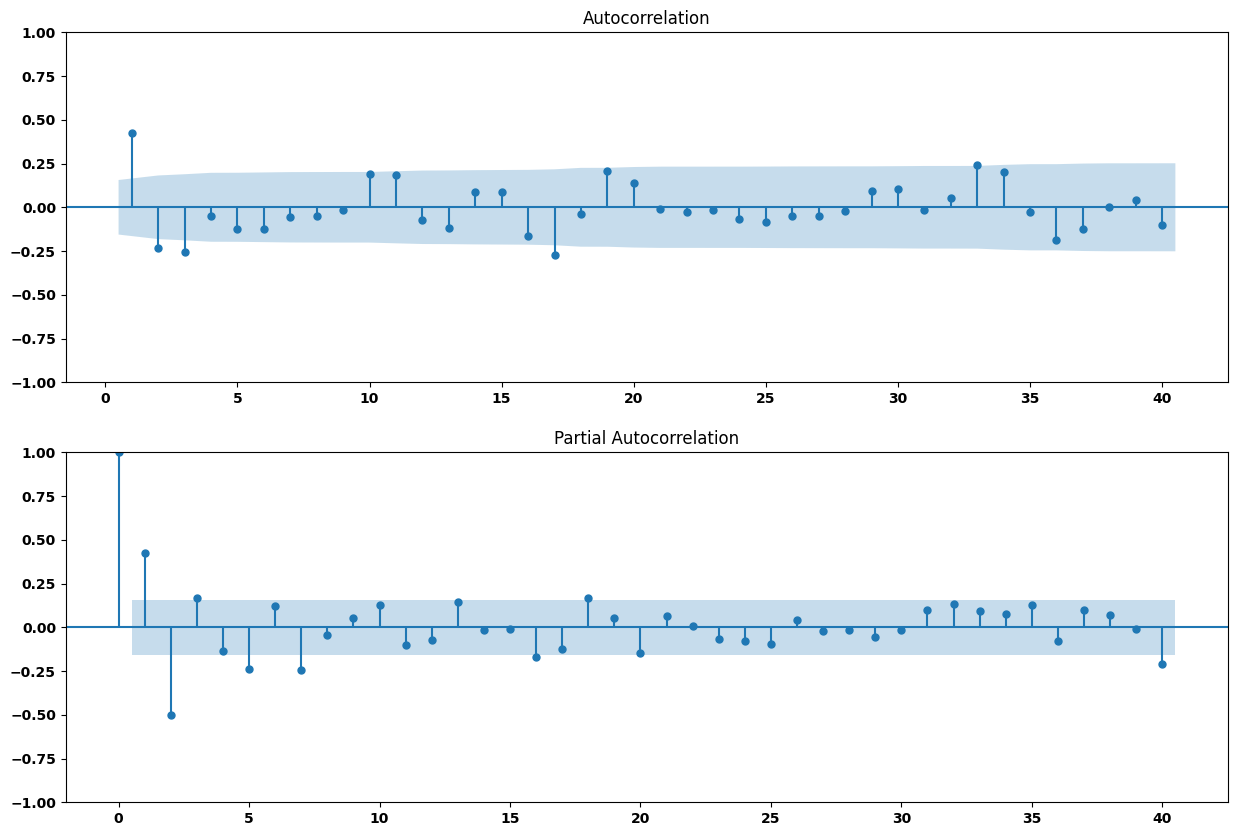

In [ ]:
# plotting acf and pacf for zipcode 85035
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_pacf(ts_94301)

In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00


In [ ]:

# using auto arima to find the best p,d,q for our model
import pmdarima as pm
model = pm.auto_arima(ts_94301, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1396.087, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1294.426, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1324.554, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1359.552, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1296.425, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1356.165, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1380.651, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1377.369, Time=0.46 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1416.075, Time=0.63 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1409.292, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1391.863, Time=0.72 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1406.863, Time=0.53 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1411.258, Time=0.49 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-1394.669, Time=1.81 sec
 ARIMA(2,0,3)(0,0,0

* The best-fitting model is specified as ARIMA(2,0,3)(0,0,0)[0] intercept,
  indicating that it includes autoregressive (AR) terms, moving average (MA) terms, and an intercept.
* The model was fitted using 158 observations from February 1, 2005, to April  
  1, 2018.
* The p-values associated with the coefficients indicate whether they are
  statistically significant. Small p-values suggest significant effects.

In [ ]:
# Data split
#splitting the data into train and test
train_94301 = ts_94301[:'2015-01']
test_94301 = ts_94301['2015-02':]

In [ ]:
# # Data split - splitting the data into train and test
# train_size = int(0.8 * len(ts_94301))
# train_94301 = ts_94301[:train_size]
# test_94301 = ts_94301[train_size:]

* Fitting an ARIMA Model on the training series. The parameters to be used will
  be gotten from the AUTO ARIMA model above.

In [ ]:
# # # initializing ARIMA model
# # ARIMAmodel = ARIMA(train_94301, order=(2, 0, 3))

# # # fit the model
# # ARIMAmodel = ARIMAmodel.fit()

# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Initializing SARIMAX model
# SARIMAmodel = SARIMAX(train_94301, order=(2, 0, 3))

# # Fit the model
# SARIMAmodel = SARIMAmodel.fit()

# # Now you can proceed with using the fitted SARIMAX model for analysis and forecasting


In [ ]:
# fit the model
import statsmodels.api as sm
import statsmodels.api as sm

# Initializing ARIMA model
ARIMAmodel = sm.tsa.ARIMA(train_94301, order=(2,0,3))
ARIMAmodel = ARIMAmodel.fit()

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  119
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 538.363
Date:                Mon, 28 Aug 2023   AIC                          -1062.726
Time:                        20:26:41   BIC                          -1043.272
Sample:                    03-01-2005   HQIC                         -1054.826
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.892e-05      0.000      0.059      0.953      -0.001       0.001
ar.L1          0.2226      0.195      1.143      0.253      -0.159       0.604
ar.L2          0.2173      0.130      1.671      0.0

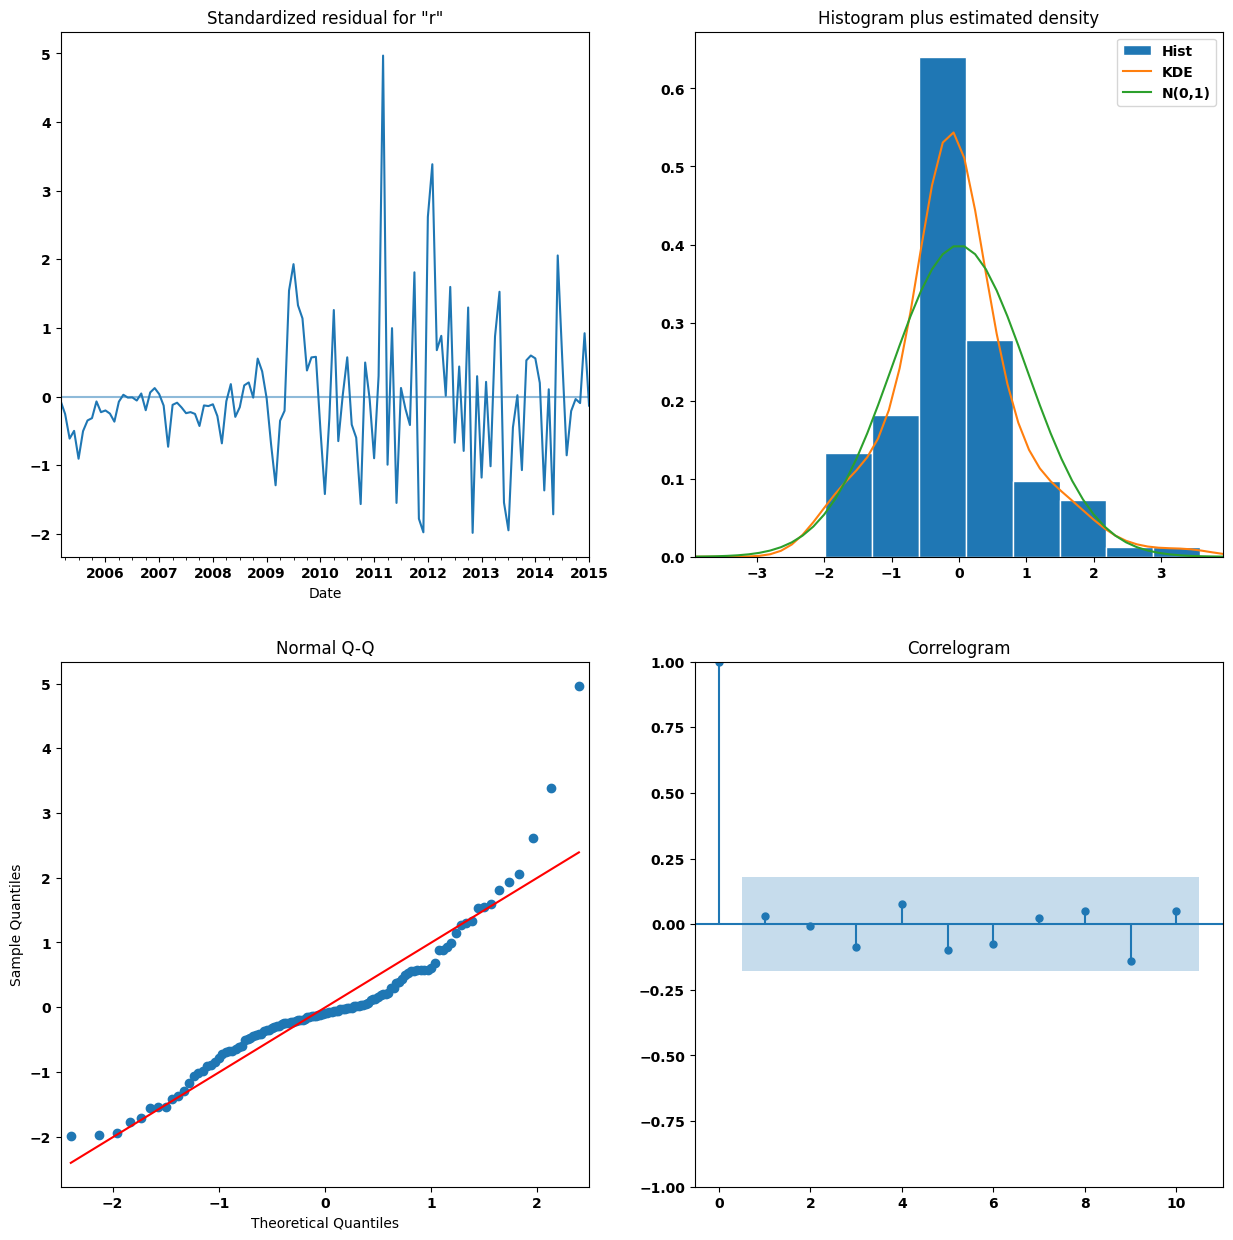

In [ ]:
# printing the model summary

print(ARIMAmodel.summary())
ARIMAmodel.plot_diagnostics(figsize=(15,15))
plt.show()

* The residuals should not be correlated and they should have a normal
  distribution to satisfy the normality assumptions.

* The qq- plot on the bottom left shows that the residuals follow a linear  
  trend line hence they are normally distributed.

* The correlogram plot on the bottom left show there are low correlations with
  their lagged version. This tells us that there isn't any obvious seasonality in our series.

* The histogram has a bell curve showing that the residuals are normally
  distributed which is a good thing.

### <a id='toc1_7_2'></a>[Step 6.2 Testing The Model's Performance](#toc0_)

In [ ]:
# creating a table of the upper and lower limits
pred = ARIMAmodel.get_prediction(start=pd.to_datetime('2015-02'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf.head()

,lower ret,upper ret
2015-02-01,-0.005108,0.005024
2015-03-01,-0.008238,0.005980
2015-04-01,-0.007111,0.007109
2015-05-01,-0.007814,0.007344
2015-06-01,-0.007642,0.007558


* Plotting the training data against the test data

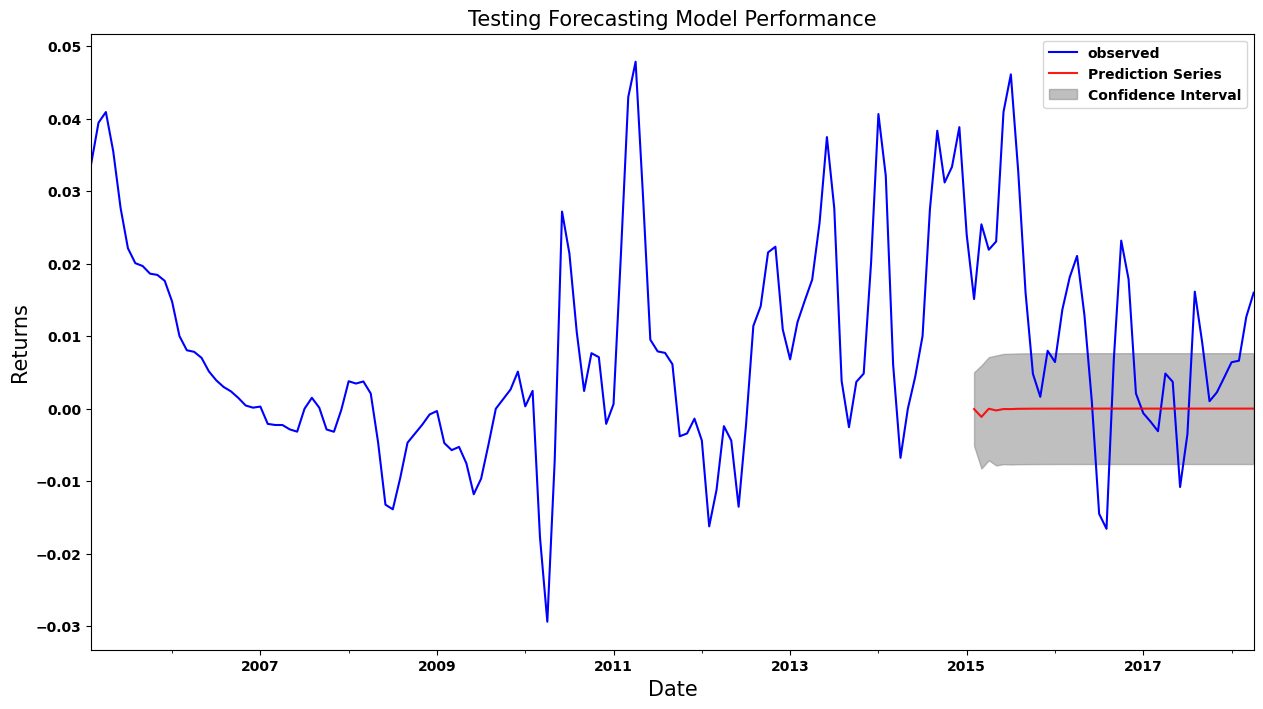

In [ ]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

# Plot observed values
ax = ts_11216.plot(label='observed',c="blue")

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9,c="red")

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='gray', alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Returns',fontsize=15)
ax.set_title('Testing Forecasting Model Performance',fontsize=15)
plt.legend()

plt.show()

### <a id='toc1_7_3'></a>[Step 6.3 Model Evaluation](#toc0_)

In [ ]:
#Getting the rmse for the model
from sklearn.metrics import mean_squared_error as MSE
MSE(test_94301,pred.predicted_mean,squared=False)

0.0036754150523843564

* This tells us that our the monthly returns would be off by 0.0037% if this model is used. Which is a good thing since it is not off by much.

### <a id='toc1_7_4'></a>[Step 6.4 Forecasting For The Next 3 Years](#toc0_)

In [ ]:
# Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.
from statsmodels.tsa.arima.model import ARIMA
ARIMA_MODEL = ARIMA(ts_94301,
                    order=(2,0,3),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(full_output.summary())

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  158
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 694.919
Date:                Mon, 28 Aug 2023   AIC                          -1375.837
Time:                        20:26:43   BIC                          -1354.578
Sample:                    03-01-2005   HQIC                         -1367.202
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.286e-05      0.000      0.197      0.844      -0.000       0.000
ar.L1          0.2145      0.160      1.336      0.181      -0.100       0.529
ar.L2          0.0933      0.106      0.883      0.3

In [ ]:
# Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['Price'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction']
future_prediction.head()

,lower,upper,prediction
2018-05-01,-0.014199,-0.003895,-0.009047
2018-06-01,-0.006247,0.007766,0.000760
2018-07-01,-0.002849,0.011205,0.004178
2018-08-01,-0.006703,0.008696,0.000997
2018-09-01,-0.007100,0.008367,0.000633


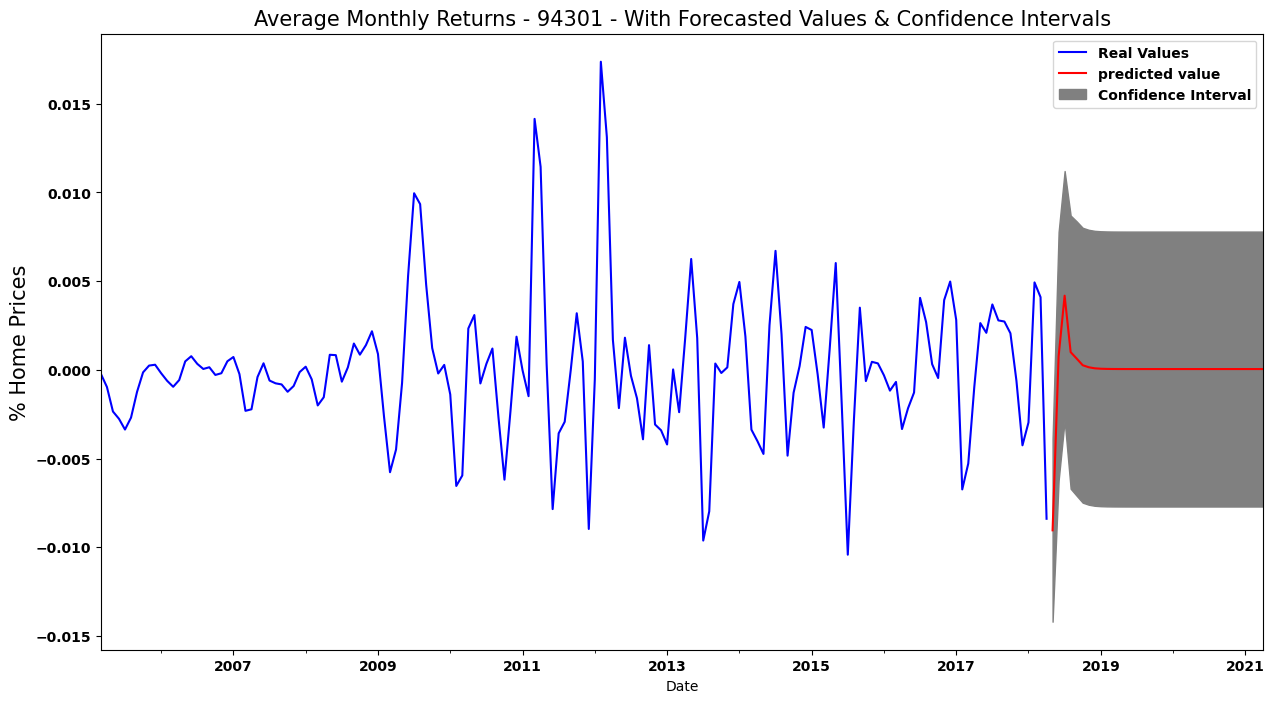

In [ ]:
# Plotting our Forecast

fig, ax = plt.subplots()
ts_94301.plot(ax=ax,label='Real Values',c="blue")


future_prediction['prediction'].plot(ax=ax,label='predicted value',c="red")

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'],
                y2= future_prediction['upper'],color='gray',
                label='Confidence Interval')
ax.legend()
plt.ylabel("% Home Prices",fontsize=15)
plt.title('Average Monthly Returns - 94301 - With Forecasted Values & Confidence Intervals',fontsize=15)
plt.show()

* The future_prediction DataFrame contains information about forecasted values
  for the time series. The 'prediction' column represents the predicted mean values for each forecasted date.
* The 'lower' and 'upper' columns provide the lower and upper bounds of the
  confidence intervals, which indicate the range of uncertainty around the forecasted values.
* These forecasted values are based on the ARIMA model's estimates and are
  intended to provide insights into potential future trends in the time series.
  From the oservation in the graph above it can be noted that can focast the future prices.

### <a id='toc1_7_5'></a>[Step 6.5 Forecasting for Every Zipcode](#toc0_)

In [ ]:
zip_predictions = {}

# Creating a for loop to forecast for every zipcode
for i in range(len(df_ts)):

    # selecting every individual series
    series = df_ts[i]["Price"]

    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]

    # Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]

    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series,
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)

    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = SARIMAX(recent_series,
                          order= auto_model.order,
                          seasonal_order= auto_model.seasonal_order,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['Price'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction']

    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1282.377, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1286.077, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1286.601, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1289.190, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1284.075, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.594 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1318.385, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1319.761, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1321.654, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1323.825, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1320.293, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fi

* The goal of this process is to identify the ARIMA model with the lowest AIC
  value, which generally represents a good trade-off between model fit and complexity. However, please note that AIC alone may not be the only criterion for selecting the best model; you should also consider other factors such as model diagnostics, validation, and domain knowledge. The Best model:  ARIMA(0,1,0)(0,0,0)[0]

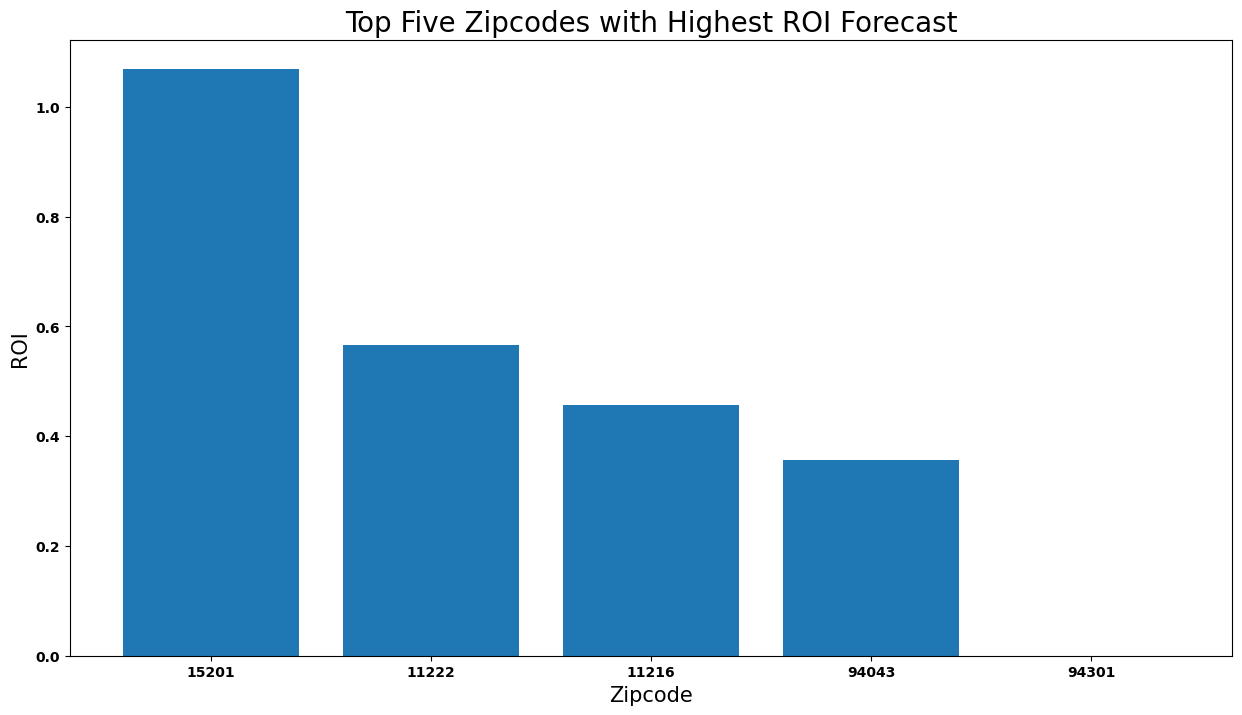

In [ ]:
# Get the top five zipcodes with the highest ROI
top_zipcodes = sorted(zip_predictions, key=zip_predictions.get, reverse=True)[:5]

# Create a list of ROI values for the top five zipcodes
roi_values = [zip_predictions[zipcode] for zipcode in top_zipcodes]

# Create a bar graph of the top five zipcodes and their corresponding ROI values
plt.bar(top_zipcodes, roi_values)
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('ROI',fontsize=15)
plt.title('Top Five Zipcodes with Highest ROI Forecast',fontsize=20)
plt.show()


* From the above graph the zipcode of 15201 has the highest ROI forecast so it
  would be beneficial if the investor invested in this zipcode.

In [ ]:
zip_roi_dict = {zipcode: zip_predictions[zipcode] for zipcode in top_zipcodes}

# Convert the dictionary to a pandas dataframe and sort it by ROI values in descending order
zip_roi_df = pd.DataFrame.from_dict(zip_roi_dict, orient='index', columns=['% ROI'])
zip_roi_df = zip_roi_df.sort_values(by='% ROI', ascending=False)

# Print the dataframe
zip_roi_df.index.name = "Zipcode"

In [ ]:
zip_roi_df

,% ROI
Zipcode,
15201,1.069114
11222,0.566847
11216,0.457121
94043,0.356641
94301,0.000000


* Based on the above graph and computed percentages, 15201 have 106%, 11222 have 56.7%, 11216 have 45.7% and 94043 have 35.7% of returns. All the Zipcodes have an encouraging predicted price seeing as they are in the positive apart from the 94301 zipcode.

* Based on the above graph, we can conclude our top five recommendations and
 their expected ROI after three years.

* The investor can then decide to invest in any of the above zipcodes apart  
  from 94301 which does not have a positive return on investment.

## <a id='toc1_8_'></a>[Step 7.Conclusion ](#toc0_)


## <a id='toc1_9_'></a>[Step 8.Limitations ](#toc0_)


## <a id='toc1_10_'></a>[Step 9.Recommendations ](#toc0_)
